In [1]:
import numpy as np
import sys
sys.path.insert(0, '../') 
from RNN_model_GRAD import *
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
try:
    import ujson as json
except ImportError:
    import json
import scipy.linalg as slin
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib as mpl
from numba import jit, njit
import scipy
from dca.dca import DynamicalComponentsAnalysis as DCA
from dca import cov_util
from sklearn.linear_model import Ridge as RR
from sklearn.metrics import r2_score
from scipy.linalg import subspace_angles
from sklearn.decomposition import PCA

# Loading Trained Networks

Loading the 10 weight matrices for each task

## Perception Task

In [2]:
weight_histories_perception = []
num_networks=10
for i in range(num_networks):
    print(i)
    with open('Perception_Task/relu/256_nodes/weight_history_{0}.json'.format(i)) as f:
        weight_history = json.load(f)
    weight_histories_perception.append(weight_history)

0
1
2
3
4
5
6
7
8
9


**Defining the 10 perception networks**

In [3]:
num_nodes = 256
time_constant = 100 #ms
timestep = 10 #ms
noise_strength = 0.01
input_weights_perception = []
perception_networks = []
for i in range(num_networks):
    weight_history = weight_histories_perception[i]
    noise_weights = np.array(weight_history['noise weights'])
    bias_weights = np.array(weight_history['bias'])
    input_weights = np.array(weight_history['input weights'])
    output_weight_matrix = np.array(weight_history['output weights'])
    connectivity_matrix = np.array(weight_history['connectivity matrix'])
    final_weights = np.array(weight_history['trained weights'][-1])


    weight_matrix = tf.Variable(final_weights)
    connectivity_matrix = tf.constant(connectivity_matrix)

    input_weight_matrix = tf.constant(np.vstack((bias_weights, noise_weights, input_weights)))   
    input_weights_perception.append(input_weight_matrix)
    init_activations = tf.constant(np.zeros((num_nodes, 1)))
    output_weight_matrix = tf.constant(output_weight_matrix)

    network = RNN(weight_matrix, connectivity_matrix, init_activations, output_weight_matrix, time_constant = time_constant,
                 timestep = timestep,activation_func = keras.activations.relu, output_nonlinearity = lambda x : x)
    perception_networks.append(network)

**Defining the 10 untrained Perception Networks**

In [4]:
num_nodes = 256
time_constant = 100 #ms
timestep = 10 #ms
noise_strength = 0.01
input_weights_perception = []
perception_networks_untrained = []
for i in range(num_networks):
    weight_history = weight_histories_perception[i]
    noise_weights = np.array(weight_history['noise weights'])
    bias_weights = np.array(weight_history['bias'])
    input_weights = np.array(weight_history['input weights'])
    output_weight_matrix = np.array(weight_history['output weights'])
    connectivity_matrix = np.array(weight_history['connectivity matrix'])
    initial_weights = np.array(weight_history['trained weights'][0])


    weight_matrix = tf.Variable(initial_weights)
    connectivity_matrix = tf.constant(connectivity_matrix)

    input_weight_matrix = tf.constant(np.vstack((bias_weights, noise_weights, input_weights)))   
    input_weights_perception.append(input_weight_matrix)
    init_activations = tf.constant(np.zeros((num_nodes, 1)))
    output_weight_matrix = tf.constant(output_weight_matrix)

    network = RNN(weight_matrix, connectivity_matrix, init_activations, output_weight_matrix, time_constant = time_constant,
                 timestep = timestep,activation_func = keras.activations.relu, output_nonlinearity = lambda x : x)
    perception_networks_untrained.append(network)

## Decision Task

In [5]:
weight_histories_decision = []
for i in range(num_networks):
    print(i)
    with open('Decision_Task/relu/256_nodes/weight_history_{0}.json'.format(i)) as f:
        weight_history = json.load(f)
    weight_histories_decision.append(weight_history)

0
1
2
3
4
5
6
7
8
9


**Defining the 10 decision networks**

In [6]:
num_nodes = 256
time_constant = 100 #ms
timestep = 10 #ms
noise_strength = 0.01
input_weights_decision = []
decision_networks = []
for i in range(num_networks):
    weight_history = weight_histories_decision[i]
    noise_weights = np.array(weight_history['noise weights'])
    bias_weights = np.array(weight_history['bias'])
    input1_weights = np.array(weight_history['input1 weights'])
    input2_weights = np.array(weight_history['input2 weights'])
    output_weight_matrix = np.array(weight_history['output weights'])
    connectivity_matrix = np.array(weight_history['connectivity matrix'])
    final_weights = np.array(weight_history['trained weights'][-1])


    weight_matrix = tf.Variable(final_weights)
    connectivity_matrix = tf.constant(connectivity_matrix)

    input_weight_matrix = tf.constant(np.vstack((bias_weights, noise_weights, input1_weights, input2_weights)))   
    input_weights_decision.append(input_weight_matrix)
    init_activations = tf.constant(np.zeros((num_nodes, 1)))
    output_weight_matrix = tf.constant(output_weight_matrix)

    network = RNN(weight_matrix, connectivity_matrix, init_activations, output_weight_matrix, time_constant = time_constant,
                 timestep = timestep,activation_func = keras.activations.relu, output_nonlinearity = lambda x : x)
    decision_networks.append(network)

**Defining the 10 untrained Decision Networks**

In [7]:
num_nodes = 256
time_constant = 100 #ms
timestep = 10 #ms
noise_strength = 0.01
input_weights_decision = []
decision_networks_untrained = []
for i in range(num_networks):
    weight_history = weight_histories_decision[i]
    noise_weights = np.array(weight_history['noise weights'])
    bias_weights = np.array(weight_history['bias'])
    input1_weights = np.array(weight_history['input1 weights'])
    input2_weights = np.array(weight_history['input2 weights'])
    output_weight_matrix = np.array(weight_history['output weights'])
    connectivity_matrix = np.array(weight_history['connectivity matrix'])
    initial_weights = np.array(weight_history['trained weights'][0])


    weight_matrix = tf.Variable(initial_weights)
    connectivity_matrix = tf.constant(connectivity_matrix)

    input_weight_matrix = tf.constant(np.vstack((bias_weights, noise_weights, input1_weights, input2_weights)))   
    input_weights_decision.append(input_weight_matrix)
    init_activations = tf.constant(np.zeros((num_nodes, 1)))
    output_weight_matrix = tf.constant(output_weight_matrix)

    network = RNN(weight_matrix, connectivity_matrix, init_activations, output_weight_matrix, time_constant = time_constant,
                 timestep = timestep,activation_func = keras.activations.relu, output_nonlinearity = lambda x : x)
    decision_networks_untrained.append(network)

# Plotting PI Curves

## Perception Task

### Untrained Network, Input=.5

**Simulating Dynamics**

In [34]:
time=10000

def rule_input(time):
    return .5 + np.random.normal(0, .05)
def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)
untrained_perception_activations = []
for i, network in enumerate(perception_networks_untrained):
    network.reset_activations()
    input_funcs = [bias, noise, rule_input]
    inputs = network.convert(time, input_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_perception[i])
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    untrained_perception_activations.append(activations)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 474.63it/s]


**Running DCA**

In [35]:
max_dim = 8
ds = np.arange(1, max_dim+1)

In [36]:
pis_untrained_perception_low_inp=[]
for activations in untrained_perception_activations:
    X = activations
    pi = np.zeros(ds.size) #Predictive Information
    dca_scores = np.zeros(ds.size)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(X) # only need to estimate this once
    for ii, d in tqdm(enumerate(ds)):
        dca_model.fit_projection(d=d)
        pi[ii] = dca_model.score()
    pis_untrained_perception_low_inp.append(pi)

8it [02:29, 18.72s/it]
8it [02:49, 21.16s/it]
8it [02:00, 15.08s/it]
8it [02:04, 15.58s/it]
8it [02:34, 19.28s/it]
8it [03:19, 24.96s/it]
8it [02:37, 19.68s/it]
8it [01:11,  8.92s/it]
8it [01:36, 12.12s/it]
8it [01:27, 10.91s/it]


**Plotting PI Curve**

<ErrorbarContainer object of 3 artists>

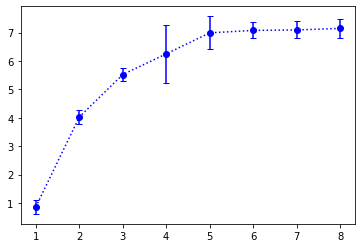

In [37]:
mean_pi = np.mean(pis_untrained_perception_low_inp,axis=0)
std_pi = np.std(pis_untrained_perception_low_inp,axis=0)

plt.errorbar(ds, mean_pi, yerr=std_pi, capsize=3,fmt='bo:')

### Untrained Network, Input=.8

**Simulating Dynamics**

In [38]:
time=10000

def rule_input(time):
    return .8 + np.random.normal(0, .05)
def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)
untrained_perception_activations = []
for i, network in enumerate(perception_networks_untrained):
    network.reset_activations()
    input_funcs = [bias, noise, rule_input]
    inputs = network.convert(time, input_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_perception[i])
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    untrained_perception_activations.append(activations)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 735.63it/s]


**Running DCA**

In [39]:
max_dim = 8
ds = np.arange(1, max_dim+1)

In [40]:
pis_untrained_perception_high_inp=[]
for activations in untrained_perception_activations:
    X = activations
    pi = np.zeros(ds.size) #Predictive Information
    dca_scores = np.zeros(ds.size)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(X) # only need to estimate this once
    for ii, d in tqdm(enumerate(ds)):
        dca_model.fit_projection(d=d)
        pi[ii] = dca_model.score()
    pis_untrained_perception_high_inp.append(pi)

8it [01:32, 11.58s/it]
8it [01:51, 13.93s/it]
8it [01:21, 10.17s/it]
8it [01:34, 11.84s/it]
8it [01:31, 11.46s/it]
8it [01:54, 14.30s/it]
8it [01:47, 13.39s/it]
8it [01:23, 10.44s/it]
8it [02:17, 17.23s/it]
8it [01:20, 10.08s/it]


**Plotting PI Curve**

<ErrorbarContainer object of 3 artists>

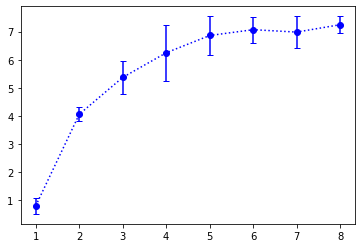

In [41]:
mean_pi = np.mean(pis_untrained_perception_high_inp,axis=0)
std_pi = np.std(pis_untrained_perception_high_inp,axis=0)

plt.errorbar(ds, mean_pi, yerr=std_pi, capsize=3,fmt='bo:')

### Input=.5

**Simulating Dynamics**

In [42]:
time=10000

def rule_input(time):
    return .5 + np.random.normal(0, .05)
def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)
perception_activations = []
for i, network in enumerate(perception_networks):
    network.reset_activations()
    input_funcs = [bias, noise, rule_input]
    inputs = network.convert(time, input_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_perception[i])
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    perception_activations.append(activations)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 683.49it/s]


**Running DCA**

In [43]:
max_dim = 8
ds = np.arange(1, max_dim+1)

In [44]:
pis_trained_perception_low_inp=[]
for activations in perception_activations:
    X = activations
    pi = np.zeros(ds.size) #Predictive Information
    dca_scores = np.zeros(ds.size)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(X) # only need to estimate this once
    for ii, d in tqdm(enumerate(ds)):
        dca_model.fit_projection(d=d)
        pi[ii] = dca_model.score()
    pis_trained_perception_low_inp.append(pi)

8it [01:19,  9.92s/it]
8it [01:42, 12.85s/it]
8it [01:04,  8.12s/it]
8it [01:51, 13.89s/it]
8it [01:25, 10.72s/it]
8it [01:29, 11.16s/it]
8it [01:15,  9.42s/it]
8it [01:26, 10.86s/it]
8it [01:30, 11.34s/it]
8it [01:20, 10.00s/it]


**Plotting PI Curve**

<ErrorbarContainer object of 3 artists>

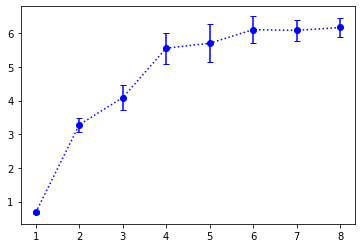

In [45]:
mean_pi = np.mean(pis_trained_perception_low_inp,axis=0)
std_pi = np.std(pis_trained_perception_low_inp,axis=0)

plt.errorbar(ds, mean_pi, yerr=std_pi, capsize=3,fmt='bo:')

### Input=.8

**Simulating Dynamics**

In [46]:
time=10000

def rule_input(time):
    return .8 + np.random.normal(0, .05)
def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)
perception_activations = []
for i, network in enumerate(perception_networks):
    network.reset_activations()
    input_funcs = [bias, noise, rule_input]
    inputs = network.convert(time, input_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_perception[i])
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    perception_activations.append(activations)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 686.75it/s]


**Running DCA**

In [47]:
max_dim = 8
ds = np.arange(1, max_dim+1)

In [48]:
pis_trained_perception_high_inp=[]
for activations in perception_activations:
    X = activations
    pi = np.zeros(ds.size) #Predictive Information
    dca_scores = np.zeros(ds.size)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(X) # only need to estimate this once
    for ii, d in tqdm(enumerate(ds)):
        dca_model.fit_projection(d=d)
        pi[ii] = dca_model.score()
    pis_trained_perception_high_inp.append(pi)

8it [02:03, 15.41s/it]
8it [02:56, 22.08s/it]
8it [02:48, 21.07s/it]
8it [01:44, 13.10s/it]
8it [02:21, 17.74s/it]
8it [02:51, 21.39s/it]
8it [02:33, 19.18s/it]
8it [02:29, 18.67s/it]
8it [02:55, 21.94s/it]
8it [02:22, 17.79s/it]


**Plotting PI Curve**

<ErrorbarContainer object of 3 artists>

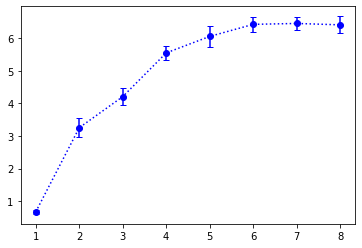

In [49]:
mean_pi = np.mean(pis_trained_perception_high_inp,axis=0)
std_pi = np.std(pis_trained_perception_high_inp,axis=0)

plt.errorbar(ds, mean_pi, yerr=std_pi, capsize=3,fmt='bo:')

## Combined Plot

Text(0.5, 0, 'Subspace Dimensionality')

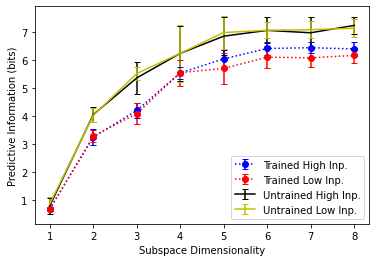

In [50]:
mean_pi_trained_perception_high_inp = np.mean(pis_trained_perception_high_inp,axis=0)
std_pi_trained_perception_high_inp = np.std(pis_trained_perception_high_inp,axis=0)

mean_pi_trained_perception_low_inp = np.mean(pis_trained_perception_low_inp,axis=0)
std_pi_trained_perception_low_inp = np.std(pis_trained_perception_low_inp,axis=0)

mean_pi_untrained_perception_high_inp = np.mean(pis_untrained_perception_high_inp,axis=0)
std_pi_untrained_perception_high_inp = np.std(pis_untrained_perception_high_inp,axis=0)

mean_pi_untrained_perception_low_inp = np.mean(pis_untrained_perception_low_inp,axis=0)
std_pi_untrained_perception_low_inp = np.std(pis_untrained_perception_low_inp,axis=0)

plt.errorbar(ds, mean_pi_trained_perception_high_inp, yerr = std_pi_trained_perception_high_inp, capsize=3,fmt='bo:', label='Trained High Inp.')
plt.errorbar(ds, mean_pi_trained_perception_low_inp, yerr = std_pi_trained_perception_low_inp, capsize=3,fmt='ro:', label='Trained Low Inp.')
plt.errorbar(ds, mean_pi_untrained_perception_high_inp, yerr = std_pi_untrained_perception_high_inp, capsize=3,fmt='k-', label='Untrained High Inp.')
plt.errorbar(ds, mean_pi_untrained_perception_low_inp, yerr = std_pi_untrained_perception_low_inp, capsize=3,fmt='y-', label='Untrained Low Inp.')
plt.legend()
plt.ylabel('Predictive Information (bits)')
plt.xlabel('Subspace Dimensionality')

## Decision Task

In [51]:
val1=0.8
val2=1.2

### Untrained Network, Input1>Input2

**Simulating Dynamics**

In [52]:
time=10000

def input1(time):
    return val2 + np.random.normal(0, .05)
def input2(time):
    return val1 + np.random.normal(0, .05)
def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)
untrained_decision_activations = []
for i, network in enumerate(decision_networks_untrained):
    network.reset_activations()
    input_funcs = [bias, noise, input1, input2]
    inputs = network.convert(time, input_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_decision[i])
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    untrained_decision_activations.append(activations)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 701.17it/s]


**Running DCA**

In [53]:
max_dim = 8
ds = np.arange(1, max_dim+1)

In [54]:
pis_untrained_decision_inp1=[]
for activations in untrained_decision_activations:
    X = activations
    pi = np.zeros(ds.size) #Predictive Information
    dca_scores = np.zeros(ds.size)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(X) # only need to estimate this once
    for ii, d in tqdm(enumerate(ds)):
        dca_model.fit_projection(d=d)
        pi[ii] = dca_model.score()
    pis_untrained_decision_inp1.append(pi)

8it [01:18,  9.79s/it]
8it [01:30, 11.34s/it]
8it [01:56, 14.52s/it]
8it [01:37, 12.14s/it]
8it [01:19,  9.90s/it]
8it [01:29, 11.20s/it]
8it [01:40, 12.50s/it]
8it [01:09,  8.70s/it]
8it [01:19, 10.00s/it]
8it [01:27, 10.98s/it]


**Plotting PI Curve**

<ErrorbarContainer object of 3 artists>

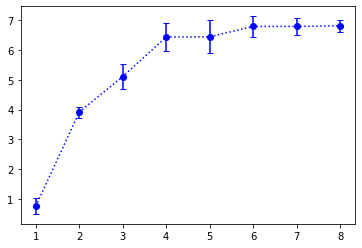

In [55]:
mean_pi = np.mean(pis_untrained_decision_inp1,axis=0)
std_pi = np.std(pis_untrained_decision_inp1,axis=0)

plt.errorbar(ds, mean_pi, yerr=std_pi, capsize=3,fmt='bo:')

### Untrained Network, Input2>Input1

**Simulating Dynamics**

In [56]:
time=10000

def input1(time):
    return val1 + np.random.normal(0, .05)
def input2(time):
    return val2 + np.random.normal(0, .05)
def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)
untrained_decision_activations = []
for i, network in enumerate(decision_networks_untrained):
    network.reset_activations()
    input_funcs = [bias, noise, input1, input2]
    inputs = network.convert(time, input_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_decision[i])
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    untrained_decision_activations.append(activations)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 703.62it/s]


**Running DCA**

In [57]:
max_dim = 8
ds = np.arange(1, max_dim+1)

In [58]:
pis_untrained_decision_inp2=[]
for activations in untrained_decision_activations:
    X = activations
    pi = np.zeros(ds.size) #Predictive Information
    dca_scores = np.zeros(ds.size)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(X) # only need to estimate this once
    for ii, d in tqdm(enumerate(ds)):
        dca_model.fit_projection(d=d)
        pi[ii] = dca_model.score()
    pis_untrained_decision_inp2.append(pi)

8it [01:43, 12.97s/it]
8it [02:18, 17.26s/it]
8it [01:31, 11.46s/it]
8it [01:50, 13.84s/it]
8it [01:29, 11.20s/it]
8it [01:29, 11.22s/it]
8it [01:51, 13.89s/it]
8it [01:47, 13.45s/it]
8it [01:40, 12.50s/it]
8it [01:45, 13.16s/it]


**Plotting PI Curve**

<ErrorbarContainer object of 3 artists>

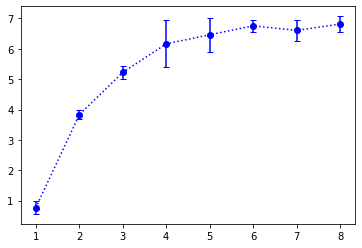

In [59]:
mean_pi = np.mean(pis_untrained_decision_inp2,axis=0)
std_pi = np.std(pis_untrained_decision_inp2,axis=0)

plt.errorbar(ds, mean_pi, yerr=std_pi, capsize=3,fmt='bo:')

### Input1>Input2

**Simulating Dynamics**

In [60]:
time=10000

def input1(time):
    return val2 + np.random.normal(0, .05)
def input2(time):
    return val1 + np.random.normal(0, .05)
def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)
trained_decision_activations = []
for i, network in enumerate(decision_networks):
    network.reset_activations()
    input_funcs = [bias, noise, input1, input2]
    inputs = network.convert(time, input_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_decision[i])
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    trained_decision_activations.append(activations)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 608.77it/s]


**Running DCA**

In [61]:
max_dim = 8
ds = np.arange(1, max_dim+1)

In [62]:
pis_trained_decision_inp1=[]
for activations in trained_decision_activations:
    X = activations
    pi = np.zeros(ds.size) #Predictive Information
    dca_scores = np.zeros(ds.size)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(X) # only need to estimate this once
    for ii, d in tqdm(enumerate(ds)):
        dca_model.fit_projection(d=d)
        pi[ii] = dca_model.score()
    pis_trained_decision_inp1.append(pi)

8it [02:02, 15.26s/it]
8it [02:51, 21.40s/it]
8it [01:49, 13.68s/it]
8it [02:04, 15.55s/it]
8it [02:15, 16.94s/it]
8it [01:57, 14.72s/it]
8it [02:02, 15.31s/it]
8it [01:47, 13.44s/it]
8it [02:49, 21.16s/it]
8it [02:44, 20.60s/it]


**Plotting PI Curve**

<ErrorbarContainer object of 3 artists>

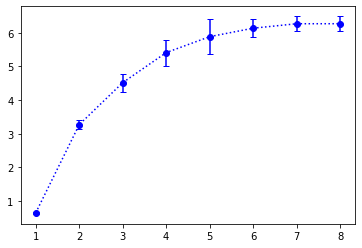

In [63]:
mean_pi = np.mean(pis_trained_decision_inp1,axis=0)
std_pi = np.std(pis_trained_decision_inp1,axis=0)

plt.errorbar(ds, mean_pi, yerr=std_pi, capsize=3,fmt='bo:')

### Input2>Input1

**Simulating Dynamics**

In [64]:
time=10000

def input1(time):
    return val1 + np.random.normal(0, .05)
def input2(time):
    return val2 + np.random.normal(0, .05)
def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)
trained_decision_activations = []
for i, network in enumerate(decision_networks):
    network.reset_activations()
    input_funcs = [bias, noise, input1, input2]
    inputs = network.convert(time, input_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_decision[i])
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    trained_decision_activations.append(activations)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 548.49it/s]


**Running DCA**

In [65]:
max_dim = 8
ds = np.arange(1, max_dim+1)

In [66]:
pis_trained_decision_inp2=[]
for activations in trained_decision_activations:
    X = activations
    pi = np.zeros(ds.size) #Predictive Information
    dca_scores = np.zeros(ds.size)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(X) # only need to estimate this once
    for ii, d in tqdm(enumerate(ds)):
        dca_model.fit_projection(d=d)
        pi[ii] = dca_model.score()
    pis_trained_decision_inp2.append(pi)

8it [02:05, 15.66s/it]
8it [02:41, 20.20s/it]
8it [01:45, 13.18s/it]
8it [01:38, 12.30s/it]
8it [01:28, 11.03s/it]
8it [02:23, 17.96s/it]
8it [00:54,  6.81s/it]
8it [01:16,  9.61s/it]
8it [01:52, 14.07s/it]
8it [02:08, 16.10s/it]


**Plotting PI Curve**

<ErrorbarContainer object of 3 artists>

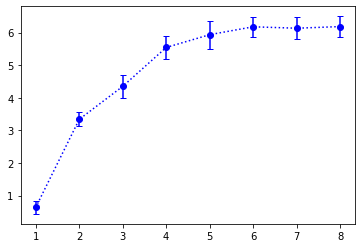

In [67]:
mean_pi = np.mean(pis_trained_decision_inp2,axis=0)
std_pi = np.std(pis_trained_decision_inp2,axis=0)

plt.errorbar(ds, mean_pi, yerr=std_pi, capsize=3,fmt='bo:')

## Combined Plots

Text(0.5, 0, 'Subspace Dimensionality')

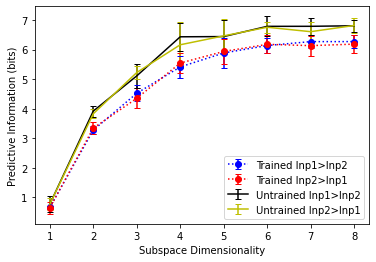

In [68]:
mean_pi_trained_decision_inp1 = np.mean(pis_trained_decision_inp1,axis=0)
std_pi_trained_decision_inp1 = np.std(pis_trained_decision_inp1,axis=0)

mean_pi_trained_decision_inp2 = np.mean(pis_trained_decision_inp2,axis=0)
std_pi_trained_decision_inp2 = np.std(pis_trained_decision_inp2,axis=0)

mean_pi_untrained_decision_inp1 = np.mean(pis_untrained_decision_inp1,axis=0)
std_pi_untrained_decision_inp1 = np.std(pis_untrained_decision_inp1,axis=0)

mean_pi_untrained_decision_inp2 = np.mean(pis_untrained_decision_inp2,axis=0)
std_pi_untrained_decision_inp2 = np.std(pis_untrained_decision_inp2,axis=0)

plt.errorbar(ds, mean_pi_trained_decision_inp1, yerr = std_pi_trained_decision_inp1, capsize=3,fmt='bo:', label='Trained Inp1>Inp2')
plt.errorbar(ds, mean_pi_trained_decision_inp2, yerr = std_pi_trained_decision_inp2, capsize=3,fmt='ro:', label='Trained Inp2>Inp1')
plt.errorbar(ds, mean_pi_untrained_decision_inp1, yerr = std_pi_untrained_decision_inp1, capsize=3,fmt='k-', label='Untrained Inp1>Inp2')
plt.errorbar(ds, mean_pi_untrained_decision_inp2, yerr = std_pi_untrained_decision_inp2, capsize=3,fmt='y-', label='Untrained Inp2>Inp1')
plt.legend()
plt.ylabel('Predictive Information (bits)')
plt.xlabel('Subspace Dimensionality')

# Scatter of DCA Loadings and Centrality

Centrality data was already acquired in the weight matrix analysis notebook. This analysis is with no input.

## Perception Networks

### High Input

**Acquiring DCA Loadings (d=2)**

In [83]:
time=10000
def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)
def rule_input(time):
    return 0.8 + np.random.normal(0,0.05)
d=2
dca_loadings = []
for network in tqdm(perception_networks):
    network.reset_activations()
    input_funcs = [bias, noise, rule_input]
    inputs = network.convert(time, input_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_perception[i], disable_progress_bar=True)
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(activations)
    dca_model.fit_projection(d=d)
    mat = dca_model.coef_
    loadings = np.linalg.norm(mat, axis=1).tolist()
    dca_loadings += loadings

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [03:33<00:00, 21.35s/it]


In [84]:
dca_loadings = np.asarray(dca_loadings)
centrality_coeffs = np.load('centrality_coeffs_final_perception.npy')

Values for network 0-8, network 9 is an outlier

Text(0, 0.5, 'Centrality Coefficient')

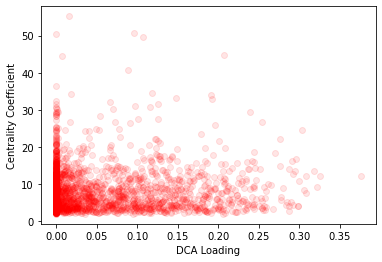

In [85]:
plt.errorbar(dca_loadings[:9*num_nodes], centrality_coeffs[:9*num_nodes],fmt='ro', alpha=0.1)
plt.xlabel('DCA Loading')
plt.ylabel('Centrality Coefficient')

**Plot for a single network**

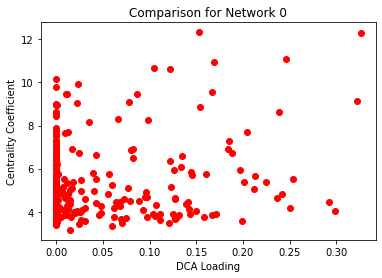

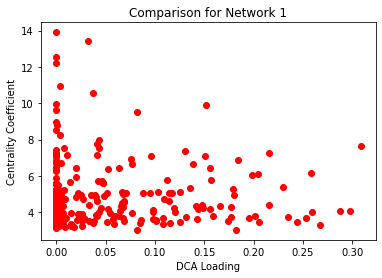

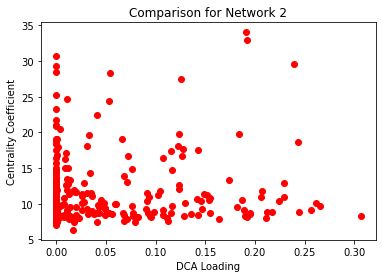

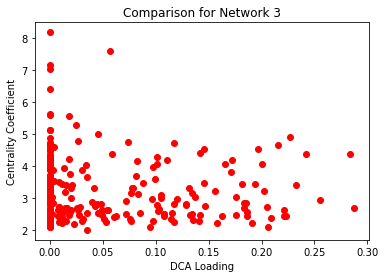

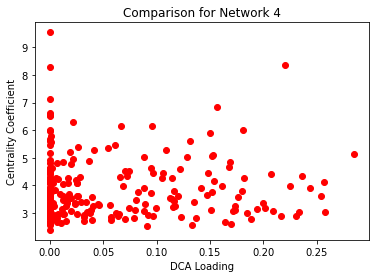

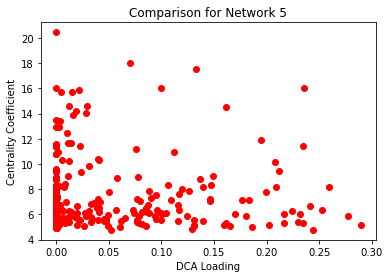

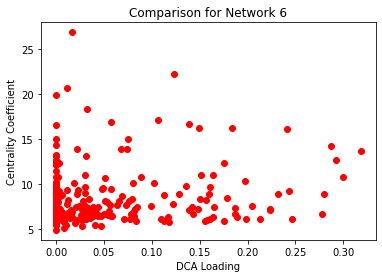

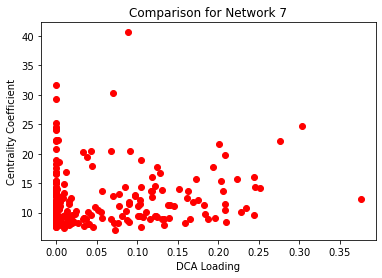

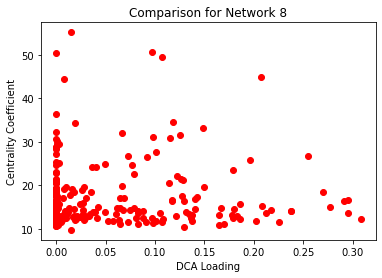

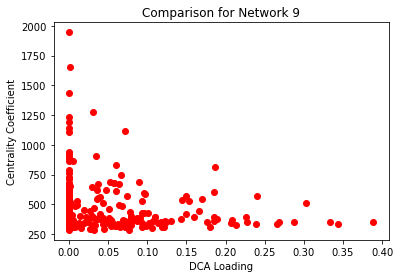

In [86]:
for network_num in range(10):
    plt.errorbar(dca_loadings[network_num*num_nodes:(network_num+1)*num_nodes], centrality_coeffs[network_num*num_nodes:(network_num+1)*num_nodes],fmt='ro')
    plt.xlabel('DCA Loading')
    plt.ylabel('Centrality Coefficient')
    plt.title('Comparison for Network {0}'.format(network_num))
    plt.show()

### Initial vs Final Comparison 
**(Acquiring intitial Loadings)**

In [87]:
time=10000
def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)

def rule_input(time):
    return 0.8 + np.random.normal(0,0.05)
d=2
dca_loadings_untrained = []
for network in tqdm(perception_networks_untrained):
    network.reset_activations()
    input_funcs = [bias, noise, rule_input]
    inputs = network.convert(time, input_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_perception[i], disable_progress_bar=True)
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(activations)
    dca_model.fit_projection(d=d)
    mat = dca_model.coef_
    loadings = np.linalg.norm(mat, axis=1).tolist()
    dca_loadings_untrained += loadings

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [03:22<00:00, 20.27s/it]


In [88]:
dca_loadings_untrained = np.asarray(dca_loadings_untrained)

Text(0, 0.5, 'DCA Loading (Final)')

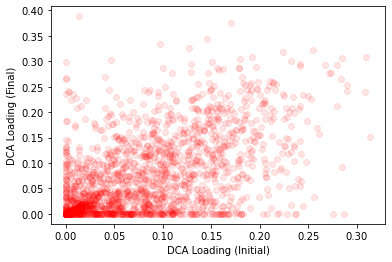

In [89]:
plt.errorbar(dca_loadings_untrained, dca_loadings,fmt='ro', alpha=0.1)
plt.xlabel('DCA Loading (Initial)')
plt.ylabel('DCA Loading (Final)')

**Plot for a single network**

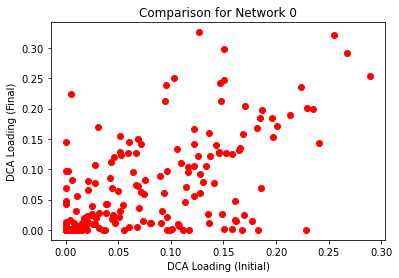

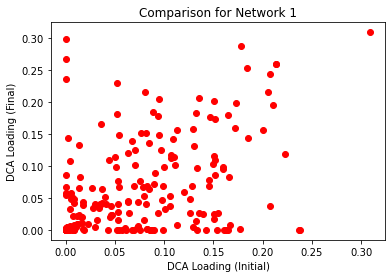

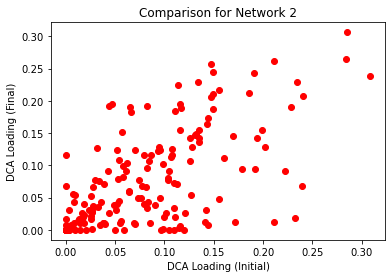

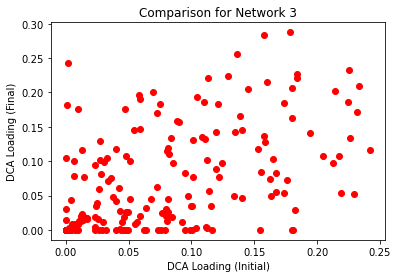

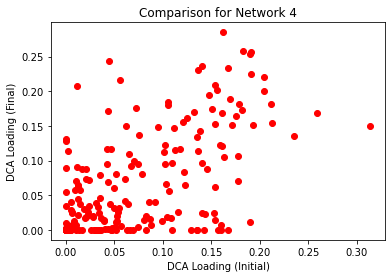

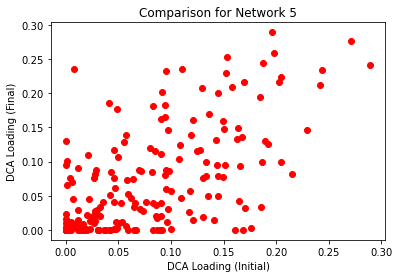

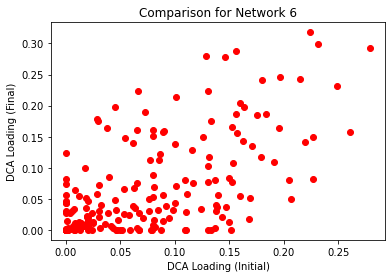

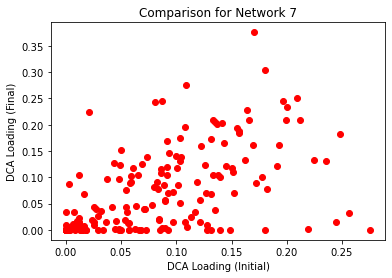

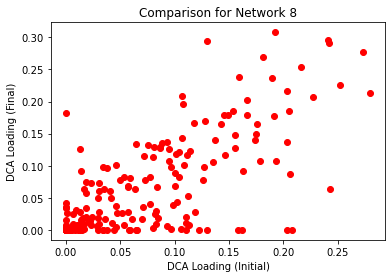

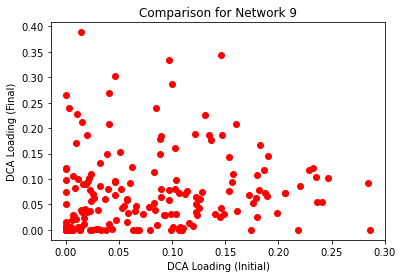

In [90]:
for network_num in range(10):
    plt.errorbar(dca_loadings_untrained[network_num*num_nodes:(network_num+1)*num_nodes], dca_loadings[network_num*num_nodes:(network_num+1)*num_nodes],fmt='ro')
    plt.xlabel('DCA Loading (Initial)')
    plt.ylabel('DCA Loading (Final)')
    plt.title('Comparison for Network {0}'.format(network_num))
    plt.show()

### Low Input

**Acquiring DCA Loadings (d=2)**

In [91]:
time=10000
def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)
def rule_input(time):
    return 0.5 + np.random.normal(0,0.05)
d=2
dca_loadings = []
for network in tqdm(perception_networks):
    network.reset_activations()
    input_funcs = [bias, noise, rule_input]
    inputs = network.convert(time, input_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_perception[i], disable_progress_bar=True)
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(activations)
    dca_model.fit_projection(d=d)
    mat = dca_model.coef_
    loadings = np.linalg.norm(mat, axis=1).tolist()
    dca_loadings += loadings

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [03:01<00:00, 18.12s/it]


In [92]:
dca_loadings = np.asarray(dca_loadings)
centrality_coeffs = np.load('centrality_coeffs_final_perception.npy')

Values for network 0-8, network 9 is an outlier

Text(0, 0.5, 'Centrality Coefficient')

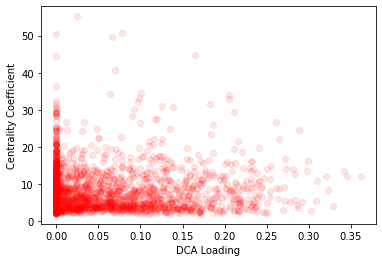

In [93]:
plt.errorbar(dca_loadings[:9*num_nodes], centrality_coeffs[:9*num_nodes],fmt='ro', alpha=0.1)
plt.xlabel('DCA Loading')
plt.ylabel('Centrality Coefficient')

**Plot for a single network**

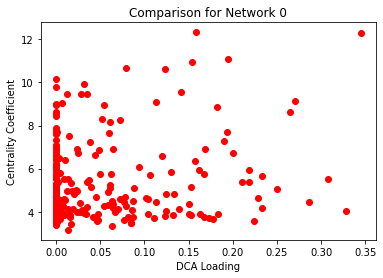

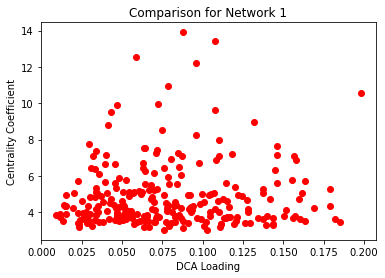

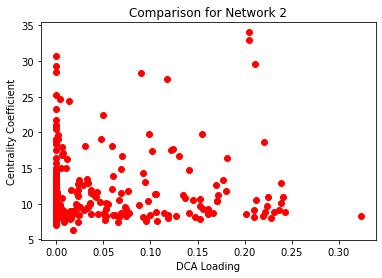

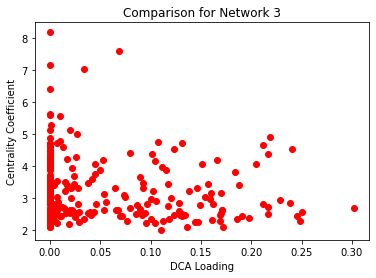

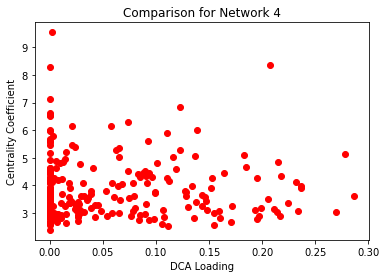

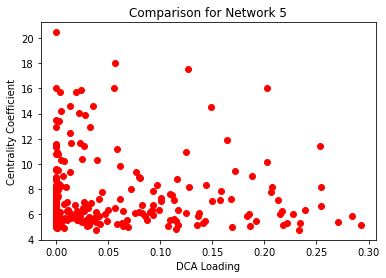

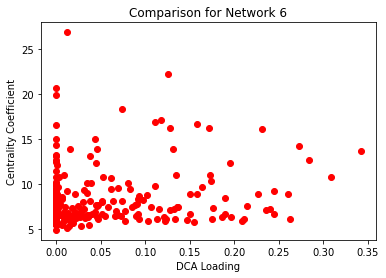

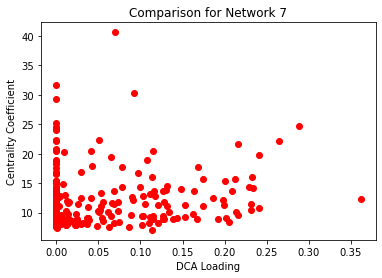

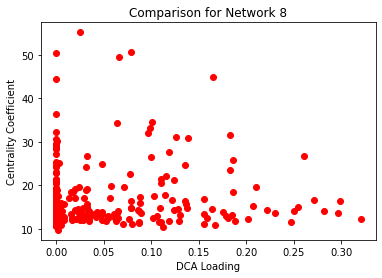

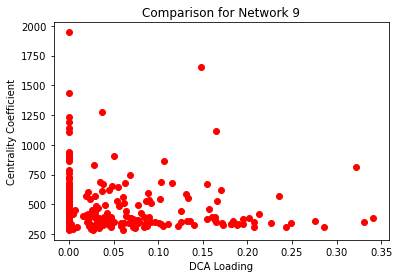

In [94]:
for network_num in range(10):
    plt.errorbar(dca_loadings[network_num*num_nodes:(network_num+1)*num_nodes], centrality_coeffs[network_num*num_nodes:(network_num+1)*num_nodes],fmt='ro')
    plt.xlabel('DCA Loading')
    plt.ylabel('Centrality Coefficient')
    plt.title('Comparison for Network {0}'.format(network_num))
    plt.show()

### Initial vs Final Comparison 
**(Acquiring intitial Loadings)**

In [95]:
time=10000
def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)

def rule_input(time):
    return 0.5 + np.random.normal(0,0.05)
d=2
dca_loadings_untrained = []
for network in tqdm(perception_networks_untrained):
    network.reset_activations()
    input_funcs = [bias, noise, rule_input]
    inputs = network.convert(time, input_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_perception[i], disable_progress_bar=True)
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(activations)
    dca_model.fit_projection(d=d)
    mat = dca_model.coef_
    loadings = np.linalg.norm(mat, axis=1).tolist()
    dca_loadings_untrained += loadings

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [03:17<00:00, 19.77s/it]


In [96]:
dca_loadings_untrained = np.asarray(dca_loadings_untrained)

Text(0, 0.5, 'DCA Loading (Final)')

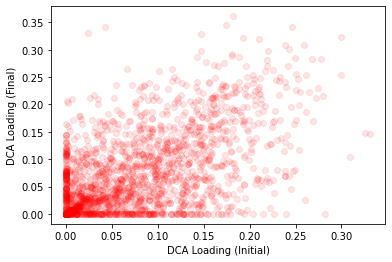

In [97]:
plt.errorbar(dca_loadings_untrained, dca_loadings,fmt='ro', alpha=0.1)
plt.xlabel('DCA Loading (Initial)')
plt.ylabel('DCA Loading (Final)')

**Plot for a single network**

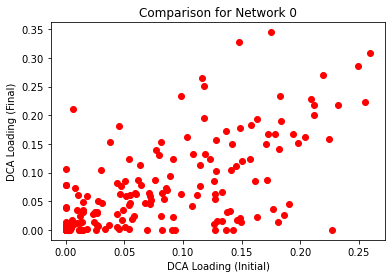

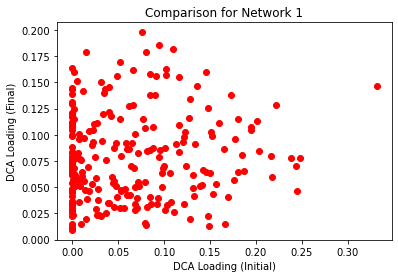

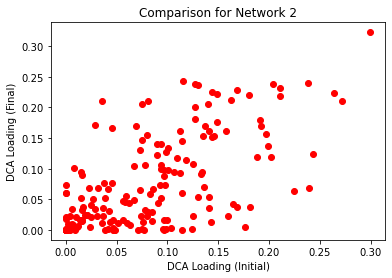

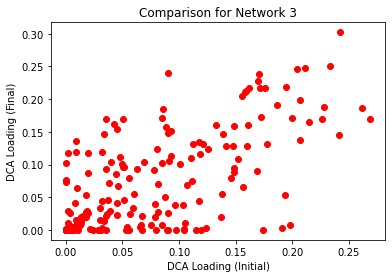

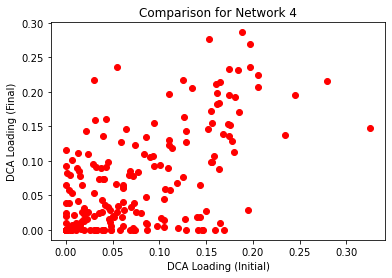

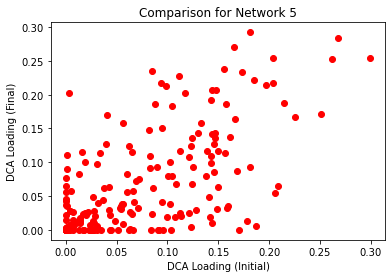

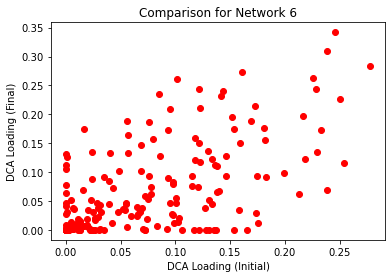

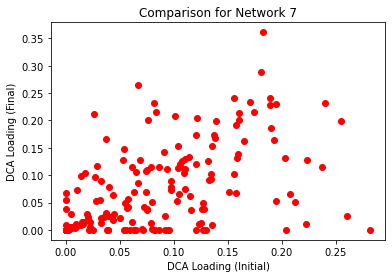

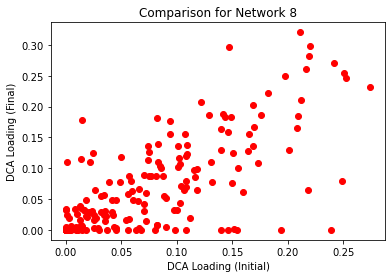

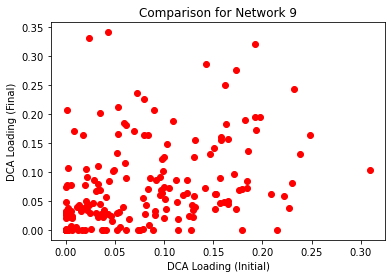

In [98]:
for network_num in range(10):
    plt.errorbar(dca_loadings_untrained[network_num*num_nodes:(network_num+1)*num_nodes], dca_loadings[network_num*num_nodes:(network_num+1)*num_nodes],fmt='ro')
    plt.xlabel('DCA Loading (Initial)')
    plt.ylabel('DCA Loading (Final)')
    plt.title('Comparison for Network {0}'.format(network_num))
    plt.show()

## Decision Networks

In [99]:
time=10000
val1=0.8
val2=1.2

def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)
def high_inp(time):
    return val2 + np.random.normal(0, 0.05)
def low_inp(time):
    return val1 + np.random.normal(0,0.05)

high_inp_funcs = [bias, noise, high_inp, low_inp]
low_inp_funcs = [bias, noise, low_inp, high_inp]

### Input1>Input2

**Acquiring DCA Loadings**

In [100]:
d=2
dca_loadings = []
for network in tqdm(decision_networks):
    network.reset_activations()
    inputs = network.convert(time, high_inp_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_decision[i], disable_progress_bar=True)
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(activations)
    dca_model.fit_projection(d=d)
    mat = dca_model.coef_
    loadings = np.linalg.norm(mat, axis=1).tolist()
    dca_loadings += loadings

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [03:07<00:00, 18.80s/it]


In [101]:
dca_loadings = np.asarray(dca_loadings)
centrality_coeffs = np.load('centrality_coeffs_final_decision.npy')

Text(0, 0.5, 'Centrality Coefficient')

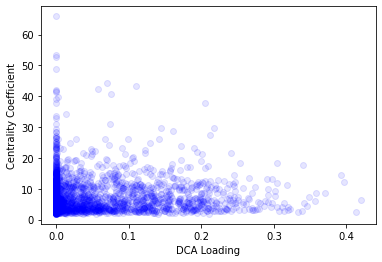

In [102]:
plt.errorbar(dca_loadings, centrality_coeffs,fmt='bo', alpha=0.1)
plt.xlabel('DCA Loading')
plt.ylabel('Centrality Coefficient')

**Plot for a single network**

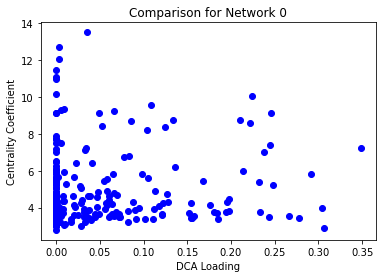

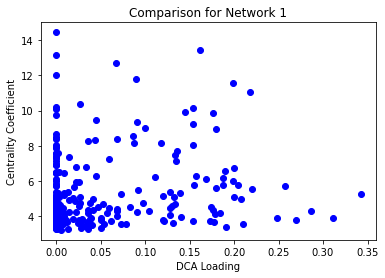

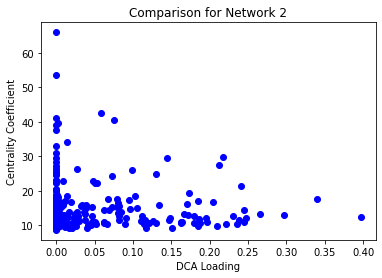

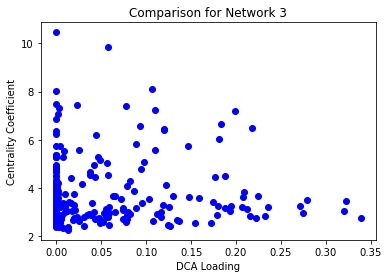

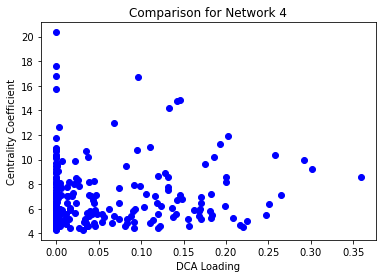

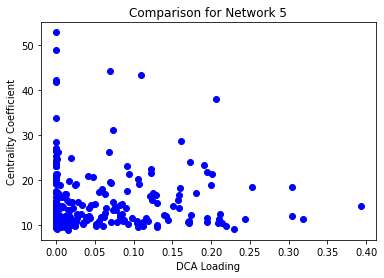

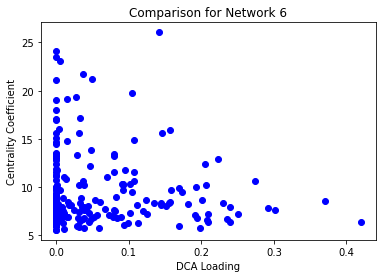

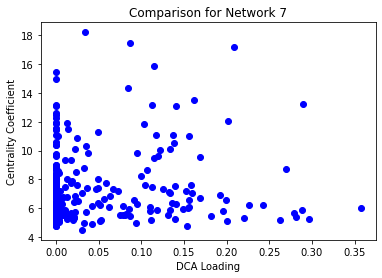

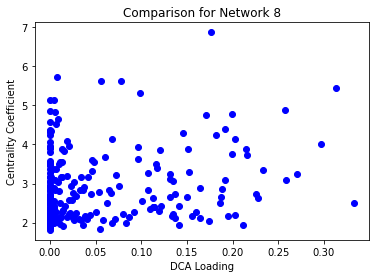

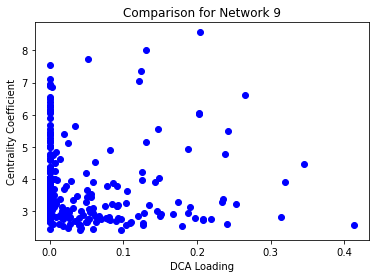

In [103]:
for network_num in range(10):
    plt.errorbar(dca_loadings[network_num*num_nodes:(network_num+1)*num_nodes], centrality_coeffs[network_num*num_nodes:(network_num+1)*num_nodes],fmt='bo')
    plt.xlabel('DCA Loading')
    plt.ylabel('Centrality Coefficient')
    plt.title('Comparison for Network {0}'.format(network_num))
    plt.show()

### Initial vs Final Comparison 
**(Acquiring intitial Loadings)**

In [104]:
d=2
dca_loadings_untrained = []
for network in tqdm(decision_networks_untrained):
    network.reset_activations()
    inputs = network.convert(time, high_inp_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_decision[i], disable_progress_bar=True)
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(activations)
    dca_model.fit_projection(d=d)
    mat = dca_model.coef_
    loadings = np.linalg.norm(mat, axis=1).tolist()
    dca_loadings_untrained += loadings

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [03:06<00:00, 18.64s/it]


In [105]:
dca_loadings_untrained = np.asarray(dca_loadings_untrained)

Text(0, 0.5, 'DCA Loading (Final)')

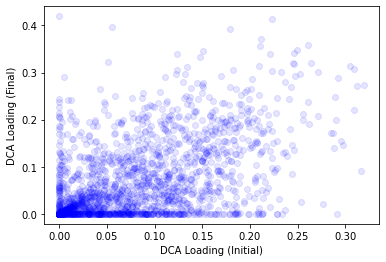

In [106]:
plt.errorbar(dca_loadings_untrained, dca_loadings,fmt='bo', alpha=0.1)
plt.xlabel('DCA Loading (Initial)')
plt.ylabel('DCA Loading (Final)')

**Plot for a single network**

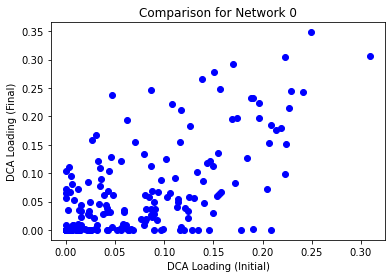

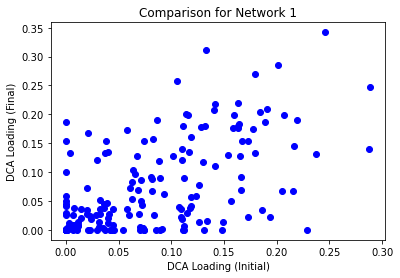

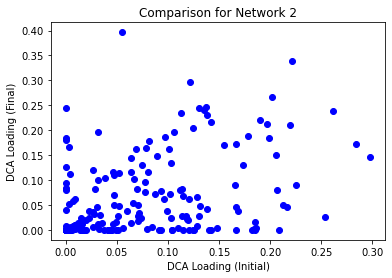

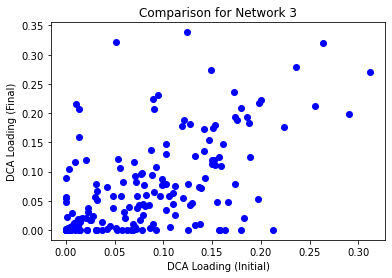

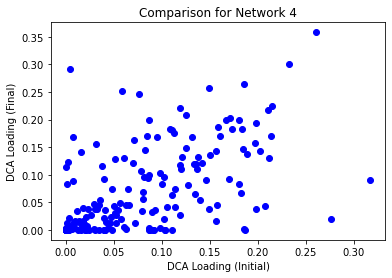

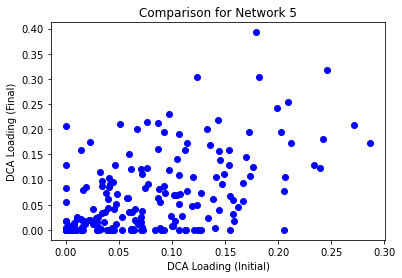

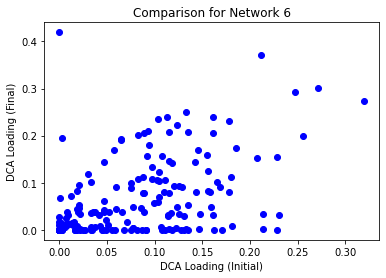

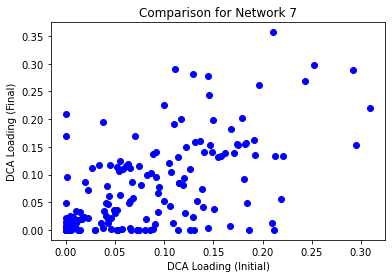

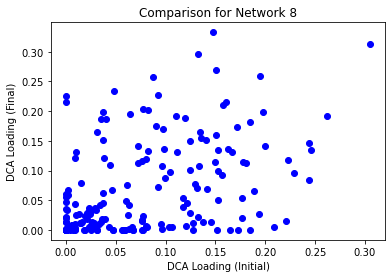

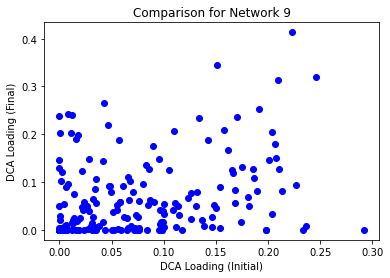

In [107]:
for network_num in range(10):
    plt.errorbar(dca_loadings_untrained[network_num*num_nodes:(network_num+1)*num_nodes], dca_loadings[network_num*num_nodes:(network_num+1)*num_nodes],fmt='bo')
    plt.xlabel('DCA Loading (Initial)')
    plt.ylabel('DCA Loading (Final)')
    plt.title('Comparison for Network {0}'.format(network_num))
    plt.show()

### Input2>Input1

**Acquiring DCA Loadings**

In [108]:
d=2
dca_loadings = []
for network in tqdm(decision_networks):
    network.reset_activations()
    inputs = network.convert(time, low_inp_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_decision[i], disable_progress_bar=True)
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(activations)
    dca_model.fit_projection(d=d)
    mat = dca_model.coef_
    loadings = np.linalg.norm(mat, axis=1).tolist()
    dca_loadings += loadings

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [03:05<00:00, 18.50s/it]


In [109]:
dca_loadings = np.asarray(dca_loadings)
centrality_coeffs = np.load('centrality_coeffs_final_decision.npy')

Text(0, 0.5, 'Centrality Coefficient')

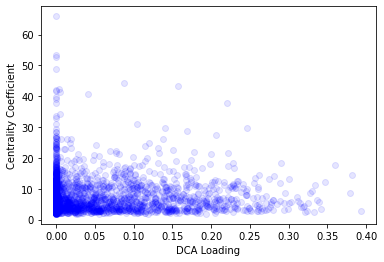

In [110]:
plt.errorbar(dca_loadings, centrality_coeffs,fmt='bo', alpha=0.1)
plt.xlabel('DCA Loading')
plt.ylabel('Centrality Coefficient')

**Plot for a single network**

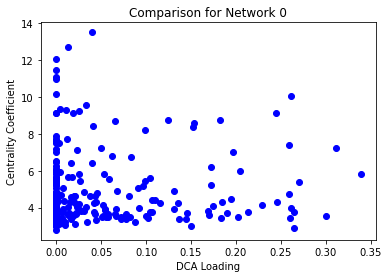

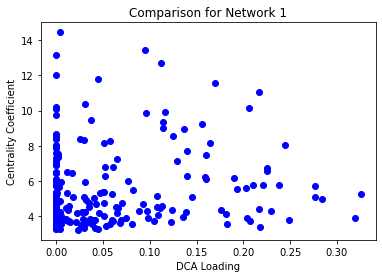

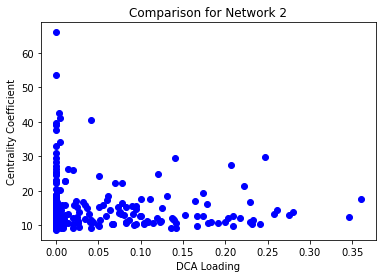

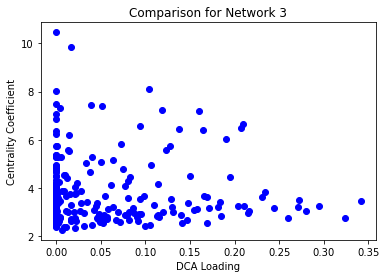

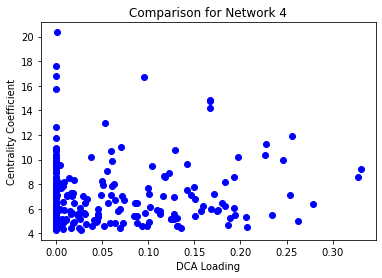

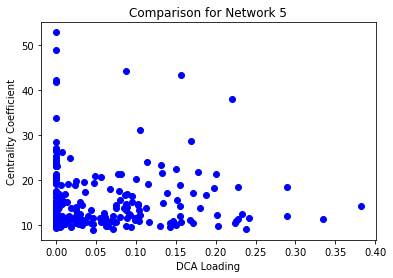

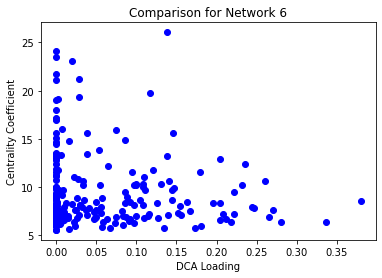

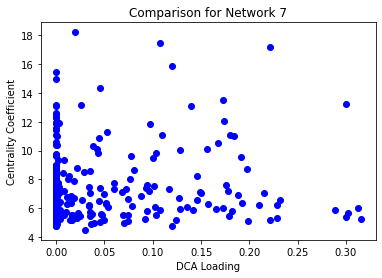

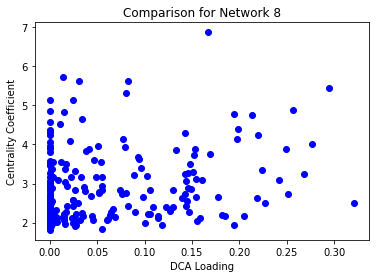

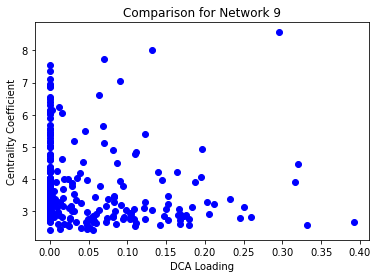

In [111]:
for network_num in range(10):
    plt.errorbar(dca_loadings[network_num*num_nodes:(network_num+1)*num_nodes], centrality_coeffs[network_num*num_nodes:(network_num+1)*num_nodes],fmt='bo')
    plt.xlabel('DCA Loading')
    plt.ylabel('Centrality Coefficient')
    plt.title('Comparison for Network {0}'.format(network_num))
    plt.show()

### Initial vs Final Comparison 
**(Acquiring intitial Loadings)**

In [112]:
d=2
dca_loadings_untrained = []
for network in tqdm(decision_networks_untrained):
    network.reset_activations()
    inputs = network.convert(time, low_inp_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_decision[i], disable_progress_bar=True)
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(activations)
    dca_model.fit_projection(d=d)
    mat = dca_model.coef_
    loadings = np.linalg.norm(mat, axis=1).tolist()
    dca_loadings_untrained += loadings

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [03:06<00:00, 18.62s/it]


In [113]:
dca_loadings_untrained = np.asarray(dca_loadings_untrained)

Text(0, 0.5, 'DCA Loading (Final)')

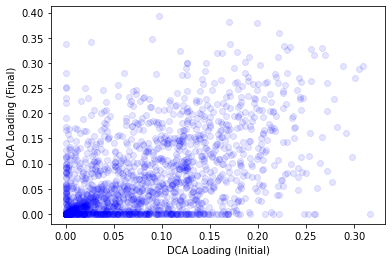

In [114]:
plt.errorbar(dca_loadings_untrained, dca_loadings,fmt='bo', alpha=0.1)
plt.xlabel('DCA Loading (Initial)')
plt.ylabel('DCA Loading (Final)')

**Plot for a single network**

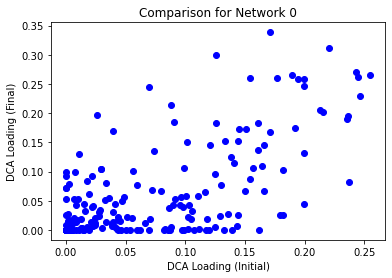

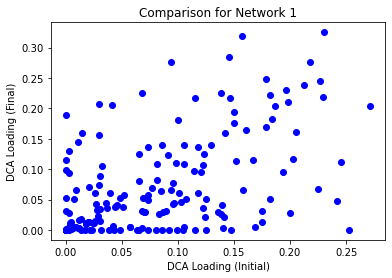

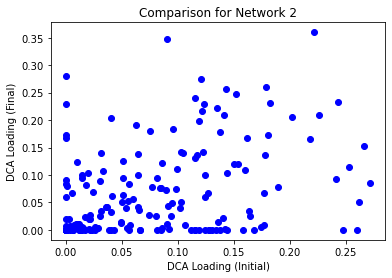

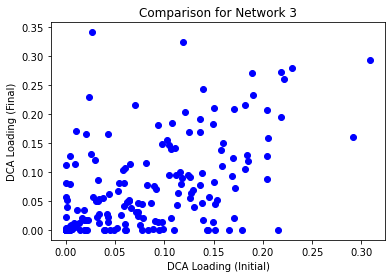

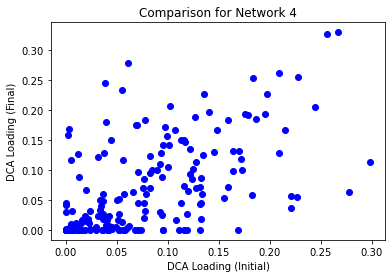

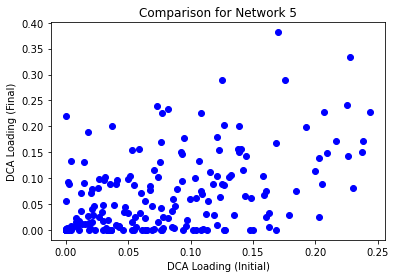

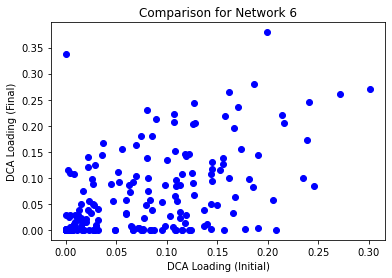

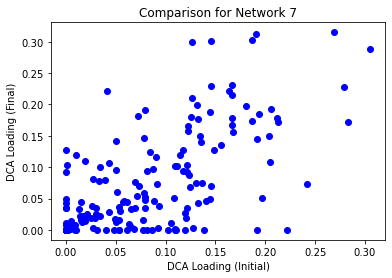

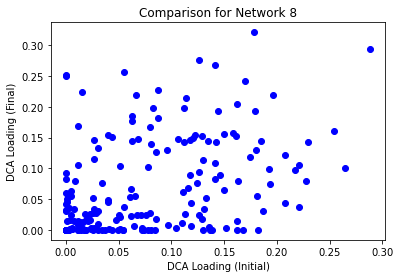

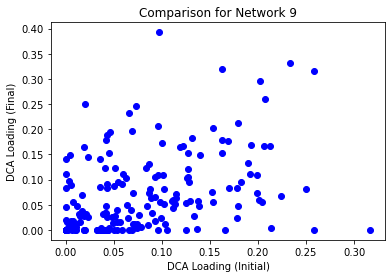

In [115]:
for network_num in range(10):
    plt.errorbar(dca_loadings_untrained[network_num*num_nodes:(network_num+1)*num_nodes], dca_loadings[network_num*num_nodes:(network_num+1)*num_nodes],fmt='bo')
    plt.xlabel('DCA Loading (Initial)')
    plt.ylabel('DCA Loading (Final)')
    plt.title('Comparison for Network {0}'.format(network_num))
    plt.show()

# Subspace angle between DCA projection and Output Matrix

## Decision Task

In [116]:
time=10000
val1=0.8
val2=1.2

def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)
def high_inp(time):
    return val2 + np.random.normal(0, 0.05)
def low_inp(time):
    return val1 + np.random.normal(0,0.05)

high_inp_funcs = [bias, noise, high_inp, low_inp]
low_inp_funcs = [bias, noise, low_inp, high_inp]

### Input1 > Input2

In [117]:
ds = np.arange(1,9,1)
subspace_angles_decision = []
pca_angles_decision = []
for network in tqdm(decision_networks):
    network.reset_activations()
    redout = np.transpose(network.output_weight_matrix.numpy())
    redout /= np.linalg.norm(redout)
    inputs = network.convert(time, high_inp_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_decision[i], disable_progress_bar=True)
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(activations)
    angles = []
    angles_pca = []
    for d in ds:
        pca_model = PCA(n_components=d)
        pca_model.fit(activations)
        pca_coefs = np.transpose(pca_model.components_)
        angles_pca.append(scipy.linalg.subspace_angles(pca_coefs, redout)[0])
        dca_model.fit_projection(d=d)
        mat = dca_model.coef_
        angle = scipy.linalg.subspace_angles(mat, redout)[0]
        angles.append(angle)
    subspace_angles_decision.append(angles)
    pca_angles_decision.append(angles_pca)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [14:17<00:00, 85.80s/it]


In [118]:
mean_subspace_angles_decision = np.mean(subspace_angles_decision, axis=0)
std_subspace_angles_decision = np.std(subspace_angles_decision, axis=0)

mean_pca_subspace_angles_decision = np.mean(pca_angles_decision, axis=0)
std_pca_subspace_angles_decision = np.std(pca_angles_decision, axis=0)

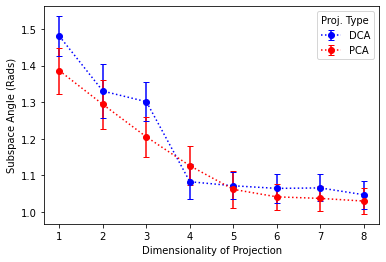

In [119]:
plt.errorbar(ds, mean_subspace_angles_decision, yerr = std_subspace_angles_decision, capsize=3, fmt='bo:', label='DCA')
plt.errorbar(ds, mean_pca_subspace_angles_decision, yerr = std_pca_subspace_angles_decision, capsize=3, fmt='ro:', label='PCA')
plt.ylabel('Subspace Angle (Rads)')
plt.xlabel('Dimensionality of Projection')
plt.legend(title='Proj. Type')

### Comparing with Untrained Decision Network

In [120]:
ds = np.arange(1,9,1)
subspace_angles_decision = []
pca_angles_decision = []
for network in tqdm(decision_networks_untrained):
    network.reset_activations()
    redout = np.transpose(network.output_weight_matrix.numpy())
    redout /= np.linalg.norm(redout)
    input_funcs = [bias, noise]
    inputs = network.convert(time, high_inp_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_decision[i], disable_progress_bar=True)
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(activations)
    angles = []
    angles_pca = []
    for d in ds:
        pca_model = PCA(n_components=d)
        pca_model.fit(activations)
        pca_coefs = np.transpose(pca_model.components_)
        angles_pca.append(scipy.linalg.subspace_angles(pca_coefs, redout)[0])
        dca_model.fit_projection(d=d)
        mat = dca_model.coef_
        angle = scipy.linalg.subspace_angles(mat, redout)[0]
        angles.append(angle)
    subspace_angles_decision.append(angles)
    pca_angles_decision.append(angles_pca)

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [17:07<00:00, 102.75s/it]


In [121]:
mean_subspace_angles_decision = np.mean(subspace_angles_decision, axis=0)
std_subspace_angles_decision = np.std(subspace_angles_decision, axis=0)

mean_pca_subspace_angles_decision = np.mean(pca_angles_decision, axis=0)
std_pca_subspace_angles_decision = np.std(pca_angles_decision, axis=0)

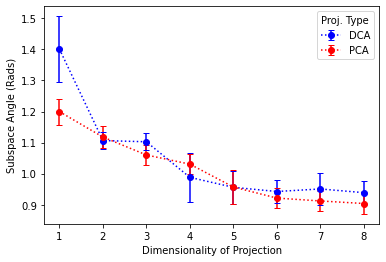

In [122]:
plt.errorbar(ds, mean_subspace_angles_decision, yerr = std_subspace_angles_decision, capsize=3, fmt='bo:', label='DCA')
plt.errorbar(ds, mean_pca_subspace_angles_decision, yerr = std_pca_subspace_angles_decision, capsize=3, fmt='ro:', label='PCA')
plt.ylabel('Subspace Angle (Rads)')
plt.xlabel('Dimensionality of Projection')
plt.legend(title='Proj. Type')

### Input2 > Input1

In [124]:
ds = np.arange(1,9,1)
subspace_angles_decision = []
pca_angles_decision = []
for network in tqdm(decision_networks):
    network.reset_activations()
    redout = np.transpose(network.output_weight_matrix.numpy())
    redout /= np.linalg.norm(redout)
    inputs = network.convert(time, low_inp_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_decision[i], disable_progress_bar=True)
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(activations)
    angles = []
    angles_pca = []
    for d in ds:
        pca_model = PCA(n_components=d)
        pca_model.fit(activations)
        pca_coefs = np.transpose(pca_model.components_)
        angles_pca.append(scipy.linalg.subspace_angles(pca_coefs, redout)[0])
        dca_model.fit_projection(d=d)
        mat = dca_model.coef_
        angle = scipy.linalg.subspace_angles(mat, redout)[0]
        angles.append(angle)
    subspace_angles_decision.append(angles)
    pca_angles_decision.append(angles_pca)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [16:19<00:00, 97.95s/it]


In [125]:
mean_subspace_angles_decision = np.mean(subspace_angles_decision, axis=0)
std_subspace_angles_decision = np.std(subspace_angles_decision, axis=0)

mean_pca_subspace_angles_decision = np.mean(pca_angles_decision, axis=0)
std_pca_subspace_angles_decision = np.std(pca_angles_decision, axis=0)

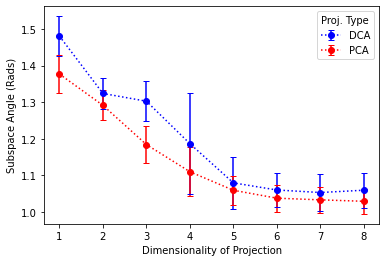

In [126]:
plt.errorbar(ds, mean_subspace_angles_decision, yerr = std_subspace_angles_decision, capsize=3, fmt='bo:', label='DCA')
plt.errorbar(ds, mean_pca_subspace_angles_decision, yerr = std_pca_subspace_angles_decision, capsize=3, fmt='ro:', label='PCA')
plt.ylabel('Subspace Angle (Rads)')
plt.xlabel('Dimensionality of Projection')
plt.legend(title='Proj. Type')

### Comparing with Untrained Decision Network

In [127]:
ds = np.arange(1,9,1)
subspace_angles_decision = []
pca_angles_decision = []
for network in tqdm(decision_networks_untrained):
    network.reset_activations()
    redout = np.transpose(network.output_weight_matrix.numpy())
    redout /= np.linalg.norm(redout)
    input_funcs = [bias, noise]
    inputs = network.convert(time, low_inp_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_decision[i], disable_progress_bar=True)
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(activations)
    angles = []
    angles_pca = []
    for d in ds:
        pca_model = PCA(n_components=d)
        pca_model.fit(activations)
        pca_coefs = np.transpose(pca_model.components_)
        angles_pca.append(scipy.linalg.subspace_angles(pca_coefs, redout)[0])
        dca_model.fit_projection(d=d)
        mat = dca_model.coef_
        angle = scipy.linalg.subspace_angles(mat, redout)[0]
        angles.append(angle)
    subspace_angles_decision.append(angles)
    pca_angles_decision.append(angles_pca)

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [17:15<00:00, 103.58s/it]


In [128]:
mean_subspace_angles_decision = np.mean(subspace_angles_decision, axis=0)
std_subspace_angles_decision = np.std(subspace_angles_decision, axis=0)

mean_pca_subspace_angles_decision = np.mean(pca_angles_decision, axis=0)
std_pca_subspace_angles_decision = np.std(pca_angles_decision, axis=0)

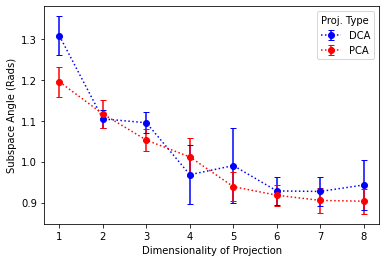

In [129]:
plt.errorbar(ds, mean_subspace_angles_decision, yerr = std_subspace_angles_decision, capsize=3, fmt='bo:', label='DCA')
plt.errorbar(ds, mean_pca_subspace_angles_decision, yerr = std_pca_subspace_angles_decision, capsize=3, fmt='ro:', label='PCA')
plt.ylabel('Subspace Angle (Rads)')
plt.xlabel('Dimensionality of Projection')
plt.legend(title='Proj. Type')

## Perception Task

### High Input

In [130]:
time=10000
def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)

def rule_input(time):
    return 0.8 + np.random.normal(0,0.05)

input_funcs = [bias, noise, rule_input]

ds = np.arange(1,9,1)
subspace_angles_perception = []
pca_angles_perception = []
for network in tqdm(perception_networks):
    network.reset_activations()
    redout = np.transpose(network.output_weight_matrix.numpy())
    redout /= np.linalg.norm(redout)
    
    inputs = network.convert(time, input_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_perception[i], disable_progress_bar=True)
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(activations)
    angles = []
    angles_pca = []
    for d in ds:
        pca_model = PCA(n_components=d)
        pca_model.fit(activations)
        pca_coefs = np.transpose(pca_model.components_)
        angles_pca.append(scipy.linalg.subspace_angles(pca_coefs, redout)[0])
        dca_model.fit_projection(d=d)
        mat = dca_model.coef_
        angle = scipy.linalg.subspace_angles(mat, redout)[0]
        angles.append(angle)
    subspace_angles_perception.append(angles)
    pca_angles_perception.append(angles_pca)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [16:38<00:00, 99.81s/it]


In [131]:
mean_subspace_angles_perception = np.mean(subspace_angles_perception, axis=0)
std_subspace_angles_perception = np.std(subspace_angles_perception, axis=0)

mean_pca_subspace_angles_perception = np.mean(pca_angles_perception, axis=0)
std_pca_subspace_angles_perception = np.std(pca_angles_perception, axis=0)

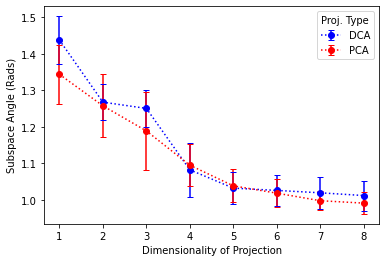

In [132]:
plt.errorbar(ds, mean_subspace_angles_perception, yerr = std_subspace_angles_perception, capsize=3, fmt='bo:', label='DCA')
plt.errorbar(ds, mean_pca_subspace_angles_perception, yerr = std_pca_subspace_angles_perception, capsize=3, fmt='ro:', label='PCA')
plt.ylabel('Subspace Angle (Rads)')
plt.xlabel('Dimensionality of Projection')
plt.legend(title='Proj. Type')

### Comparing to untrained Perception Network

In [133]:
ds = np.arange(1,9,1)
subspace_angles_perception = []
pca_angles_perception = []
for network in tqdm(perception_networks_untrained):
    network.reset_activations()
    redout = np.transpose(network.output_weight_matrix.numpy())
    redout /= np.linalg.norm(redout)
    inputs = network.convert(time, input_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_perception[i], disable_progress_bar=True)
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(activations)
    angles = []
    angles_pca = []
    for d in ds:
        pca_model = PCA(n_components=d)
        pca_model.fit(activations)
        pca_coefs = np.transpose(pca_model.components_)
        angles_pca.append(scipy.linalg.subspace_angles(pca_coefs, redout)[0])
        dca_model.fit_projection(d=d)
        mat = dca_model.coef_
        angle = scipy.linalg.subspace_angles(mat, redout)[0]
        angles.append(angle)
    subspace_angles_perception.append(angles)
    pca_angles_perception.append(angles_pca)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [15:59<00:00, 95.91s/it]


In [134]:
mean_subspace_angles_perception = np.mean(subspace_angles_perception, axis=0)
std_subspace_angles_perception = np.std(subspace_angles_perception, axis=0)

mean_pca_subspace_angles_perception = np.mean(pca_angles_perception, axis=0)
std_pca_subspace_angles_perception = np.std(pca_angles_perception, axis=0)

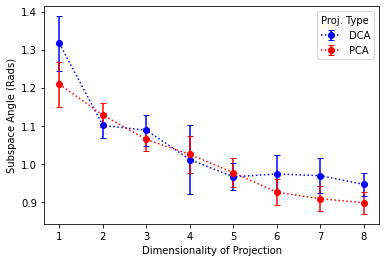

In [135]:
plt.errorbar(ds, mean_subspace_angles_perception, yerr = std_subspace_angles_perception, capsize=3, fmt='bo:', label='DCA')
plt.errorbar(ds, mean_pca_subspace_angles_perception, yerr = std_pca_subspace_angles_perception, capsize=3, fmt='ro:', label='PCA')
plt.ylabel('Subspace Angle (Rads)')
plt.xlabel('Dimensionality of Projection')
plt.legend(title='Proj. Type')

### Low Input

In [136]:
time=10000
def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)

def rule_input(time):
    return 0.5 + np.random.normal(0,0.05)

input_funcs = [bias, noise, rule_input]

ds = np.arange(1,9,1)
subspace_angles_perception = []
pca_angles_perception = []
for network in tqdm(perception_networks):
    network.reset_activations()
    redout = np.transpose(network.output_weight_matrix.numpy())
    redout /= np.linalg.norm(redout)
    
    inputs = network.convert(time, input_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_perception[i], disable_progress_bar=True)
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(activations)
    angles = []
    angles_pca = []
    for d in ds:
        pca_model = PCA(n_components=d)
        pca_model.fit(activations)
        pca_coefs = np.transpose(pca_model.components_)
        angles_pca.append(scipy.linalg.subspace_angles(pca_coefs, redout)[0])
        dca_model.fit_projection(d=d)
        mat = dca_model.coef_
        angle = scipy.linalg.subspace_angles(mat, redout)[0]
        angles.append(angle)
    subspace_angles_perception.append(angles)
    pca_angles_perception.append(angles_pca)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [13:42<00:00, 82.25s/it]


In [137]:
mean_subspace_angles_perception = np.mean(subspace_angles_perception, axis=0)
std_subspace_angles_perception = np.std(subspace_angles_perception, axis=0)

mean_pca_subspace_angles_perception = np.mean(pca_angles_perception, axis=0)
std_pca_subspace_angles_perception = np.std(pca_angles_perception, axis=0)

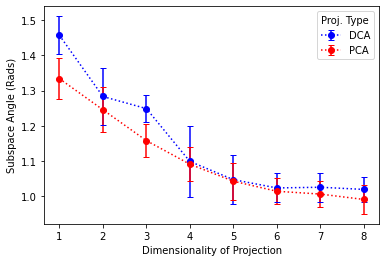

In [138]:
plt.errorbar(ds, mean_subspace_angles_perception, yerr = std_subspace_angles_perception, capsize=3, fmt='bo:', label='DCA')
plt.errorbar(ds, mean_pca_subspace_angles_perception, yerr = std_pca_subspace_angles_perception, capsize=3, fmt='ro:', label='PCA')
plt.ylabel('Subspace Angle (Rads)')
plt.xlabel('Dimensionality of Projection')
plt.legend(title='Proj. Type')

### Comparing to untrained Perception Network

In [139]:
ds = np.arange(1,9,1)
subspace_angles_perception = []
pca_angles_perception = []
for network in tqdm(perception_networks_untrained):
    network.reset_activations()
    redout = np.transpose(network.output_weight_matrix.numpy())
    redout /= np.linalg.norm(redout)
    inputs = network.convert(time, input_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_perception[i], disable_progress_bar=True)
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(activations)
    angles = []
    angles_pca = []
    for d in ds:
        pca_model = PCA(n_components=d)
        pca_model.fit(activations)
        pca_coefs = np.transpose(pca_model.components_)
        angles_pca.append(scipy.linalg.subspace_angles(pca_coefs, redout)[0])
        dca_model.fit_projection(d=d)
        mat = dca_model.coef_
        angle = scipy.linalg.subspace_angles(mat, redout)[0]
        angles.append(angle)
    subspace_angles_perception.append(angles)
    pca_angles_perception.append(angles_pca)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [15:54<00:00, 95.45s/it]


In [140]:
mean_subspace_angles_perception = np.mean(subspace_angles_perception, axis=0)
std_subspace_angles_perception = np.std(subspace_angles_perception, axis=0)

mean_pca_subspace_angles_perception = np.mean(pca_angles_perception, axis=0)
std_pca_subspace_angles_perception = np.std(pca_angles_perception, axis=0)

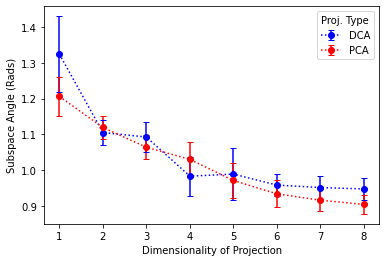

In [141]:
plt.errorbar(ds, mean_subspace_angles_perception, yerr = std_subspace_angles_perception, capsize=3, fmt='bo:', label='DCA')
plt.errorbar(ds, mean_pca_subspace_angles_perception, yerr = std_pca_subspace_angles_perception, capsize=3, fmt='ro:', label='PCA')
plt.ylabel('Subspace Angle (Rads)')
plt.xlabel('Dimensionality of Projection')
plt.legend(title='Proj. Type')

# Comparing PI for 1D DCA projection vs 1D PCA projection vs output direction projection

Trained Decision Task

In [142]:
time=10000
def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)
DCA_pis = []
PCA_pis = []
redout_pis = []
for network in tqdm(decision_networks):
    network.reset_activations()
    redout = np.transpose(network.output_weight_matrix.numpy())
    redout /= np.linalg.norm(redout)
    input_funcs = [bias, noise]
    inputs = network.convert(time, input_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_decision[i][:2], disable_progress_bar=True)
    outputs = np.array(outputs)
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    dca_model_256 = DCA(T=10, d=256)
    
    redout_pis.append(cov_util.calc_pi_from_data(X=outputs, T=10))
    
    pca_model = PCA(n_components=1)
    pca_model.fit(activations)
    transformed = pca_model.transform(activations)
    PCA_pis.append(cov_util.calc_pi_from_data(X=transformed, T=10))
    
    dca_model_256.estimate_data_statistics(activations)
    dca_model_256.fit_projection(d=1)
    transformed = dca_model_256.transform(activations)
    DCA_pis.append(cov_util.calc_pi_from_data(X=transformed, T=10))


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [02:44<00:00, 16.48s/it]


In [143]:
DCA_pis = np.array(DCA_pis)
PCA_pis = np.array(PCA_pis)
redout_pis = np.array(redout_pis)

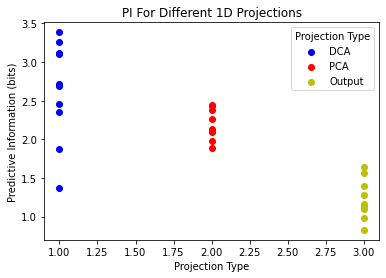

In [144]:
plt.scatter(np.ones(10), DCA_pis, c='b', label='DCA')
plt.scatter(2*np.ones(10), PCA_pis, c='r', label='PCA')
plt.scatter(3*np.ones(10), redout_pis, c='y', label='Output')
plt.title('PI For Different 1D Projections')
plt.xlabel('Projection Type')
plt.ylabel('Predictive Information (bits)')
plt.legend(title='Projection Type')

Trained Perception Task

In [145]:
time=10000
def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)
DCA_pis = []
PCA_pis = []
redout_pis = []
for network in tqdm(perception_networks):
    network.reset_activations()
    redout = np.transpose(network.output_weight_matrix.numpy())
    redout /= np.linalg.norm(redout)
    input_funcs = [bias, noise]
    inputs = network.convert(time, input_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_perception[i][:2], disable_progress_bar=True)
    outputs = np.array(outputs)
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    dca_model_256 = DCA(T=10, d=256)
    
    redout_pis.append(cov_util.calc_pi_from_data(X=outputs, T=10))
    
    pca_model = PCA(n_components=1)
    pca_model.fit(activations)
    transformed = pca_model.transform(activations)
    PCA_pis.append(cov_util.calc_pi_from_data(X=transformed, T=10))
    
    dca_model_256.estimate_data_statistics(activations)
    dca_model_256.fit_projection(d=1)
    transformed = dca_model_256.transform(activations)
    DCA_pis.append(cov_util.calc_pi_from_data(X=transformed, T=10))


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [02:47<00:00, 16.75s/it]


In [146]:
DCA_pis = np.array(DCA_pis)
PCA_pis = np.array(PCA_pis)
redout_pis = np.array(redout_pis)

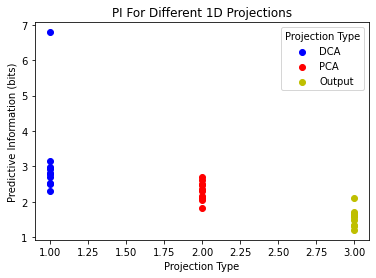

In [147]:
plt.scatter(np.ones(10), DCA_pis, c='b', label='DCA')
plt.scatter(2*np.ones(10), PCA_pis, c='r', label='PCA')
plt.scatter(3*np.ones(10), redout_pis, c='y', label='Output')
plt.title('PI For Different 1D Projections')
plt.xlabel('Projection Type')
plt.ylabel('Predictive Information (bits)')
plt.legend(title='Projection Type')

# Subspace Angles

## Perception Task

In [59]:
time=10000
def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)
def high_inp(time):
    return .8 + np.random.normal(0, 0.05)
def low_inp(time):
    return .5 + np.random.normal(0,0.05)

high_inp_funcs = [bias, noise, high_inp]
low_inp_funcs = [bias, noise, low_inp]

### Trained

In [60]:
ds = np.arange(1,9,1)
all_angles = []
for network in perception_networks:
    high_inputs = network.convert(time, high_inp_funcs)
    low_inputs = network.convert(time, low_inp_funcs)
    outputs, high_activations = network.simulate(time, high_inputs, input_weights_perception[i], disable_progress_bar=True)
    outputs, low_activations = network.simulate(time, low_inputs, input_weights_perception[i], disable_progress_bar=True)
    low_activations=[np.asarray(activation) for activation in low_activations]
    low_activations = np.asarray(low_activations)
    high_activations=[np.asarray(activation) for activation in high_activations]
    high_activations = np.asarray(high_activations)
    
    dca_model_high = DCA(T=10)
    dca_model_low = DCA(T=10)
    dca_model_high.estimate_data_statistics(high_activations)
    dca_model_low.estimate_data_statistics(low_activations)
    angles = []
    for d in tqdm(ds):
        
        dca_model_low.fit_projection(d=d)
        low_coef = dca_model_low.coef_
        
        dca_model_high.fit_projection(d=d)
        high_coef = dca_model_high.coef_
        
        angles = np.append(angles, subspace_angles(high_coef,low_coef))
    all_angles.append(angles)

trained_mean_angles = np.mean(all_angles, axis=0) 
trained_std_angles = np.std(all_angles, axis=0)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [02:57<00:00, 22.22s/it]


In [61]:
x = []
for d in ds:
    x = np.append(x, d*np.ones(d))

Text(0.5, 1.0, 'Subspace Angles for Low vs. High Input')

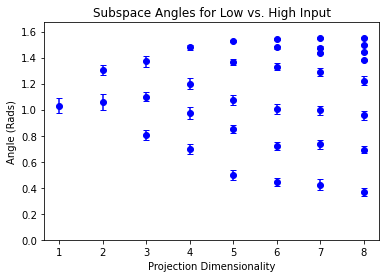

In [62]:
plt.errorbar(x, trained_mean_angles, yerr = trained_std_angles/np.sqrt(10), fmt = 'bo', capsize = 3)
plt.xlabel('Projection Dimensionality')
plt.ylabel('Angle (Rads)')
plt.ylim(0, np.pi/2 + 0.1)
plt.title('Subspace Angles for Low vs. High Input')

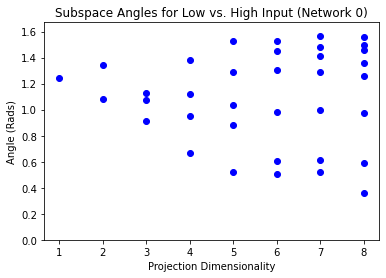

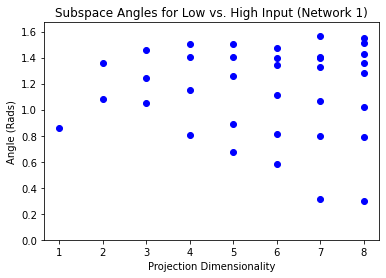

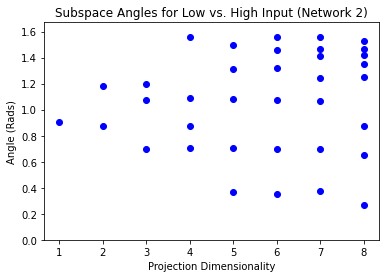

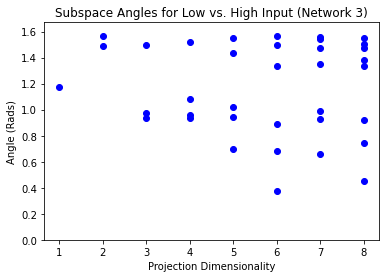

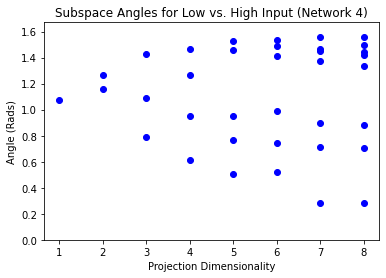

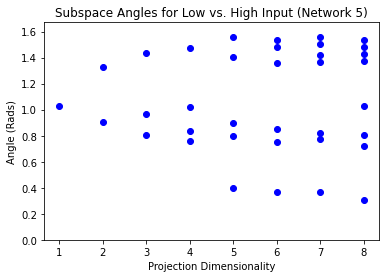

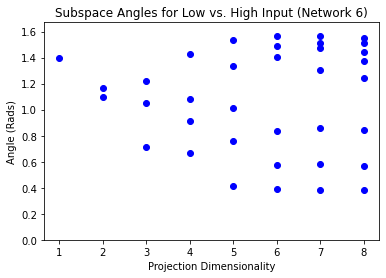

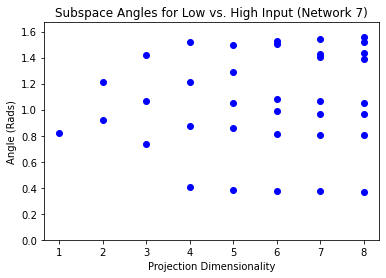

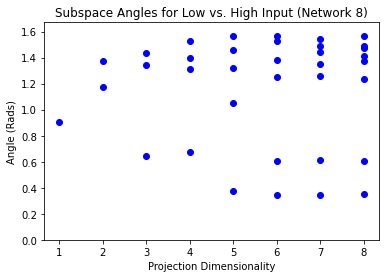

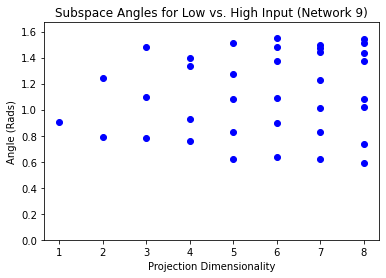

In [63]:
for i,angles in enumerate(all_angles):
    plt.errorbar(x, angles, fmt = 'bo')
    plt.xlabel('Projection Dimensionality')
    plt.ylabel('Angle (Rads)')
    plt.ylim(0, np.pi/2 + 0.1)
    plt.title('Subspace Angles for Low vs. High Input (Network {0})'.format(i))
    plt.show()

### Untrained

In [64]:
ds = np.arange(1,9,1)
all_angles = []
for network in perception_networks_untrained:
    high_inputs = network.convert(time, high_inp_funcs)
    low_inputs = network.convert(time, low_inp_funcs)
    outputs, high_activations = network.simulate(time, high_inputs, input_weights_perception[i], disable_progress_bar=True)
    outputs, low_activations = network.simulate(time, low_inputs, input_weights_perception[i], disable_progress_bar=True)
    low_activations=[np.asarray(activation) for activation in low_activations]
    low_activations = np.asarray(low_activations)
    high_activations=[np.asarray(activation) for activation in high_activations]
    high_activations = np.asarray(high_activations)
    
    dca_model_high = DCA(T=10)
    dca_model_low = DCA(T=10)
    dca_model_high.estimate_data_statistics(high_activations)
    dca_model_low.estimate_data_statistics(low_activations)
    angles = []
    for d in tqdm(ds):
        
        dca_model_low.fit_projection(d=d)
        low_coef = dca_model_low.coef_
        
        dca_model_high.fit_projection(d=d)
        high_coef = dca_model_high.coef_
        
        angles = np.append(angles, subspace_angles(high_coef,low_coef))
    all_angles.append(angles)

untrained_mean_angles = np.mean(all_angles, axis=0) 
untrained_std_angles = np.std(all_angles, axis=0)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [03:26<00:00, 25.83s/it]


In [65]:
x = []
for d in ds:
    x = np.append(x, d*np.ones(d))

Text(0.5, 1.0, 'Subspace Angles for Low vs. High Input')

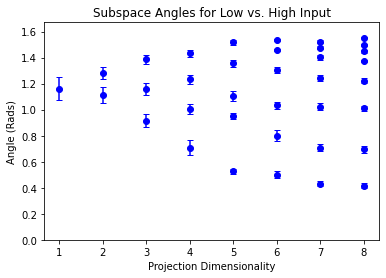

In [66]:
plt.errorbar(x, untrained_mean_angles, yerr = untrained_std_angles/np.sqrt(10), fmt = 'bo', capsize = 3)
plt.xlabel('Projection Dimensionality')
plt.ylabel('Angle (Rads)')
plt.ylim(0, np.pi/2 + 0.1)
plt.title('Subspace Angles for Low vs. High Input')

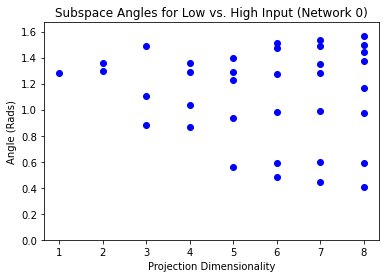

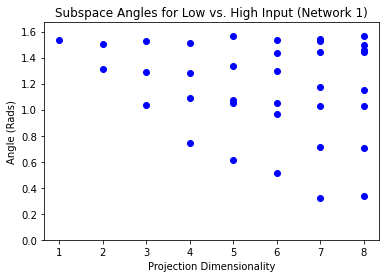

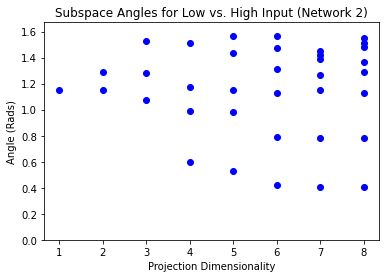

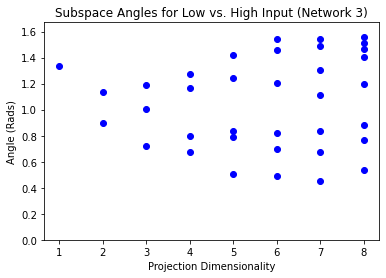

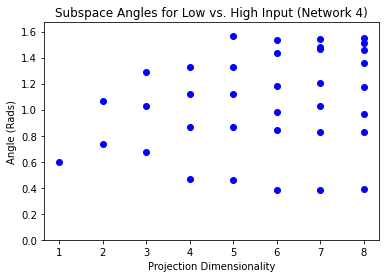

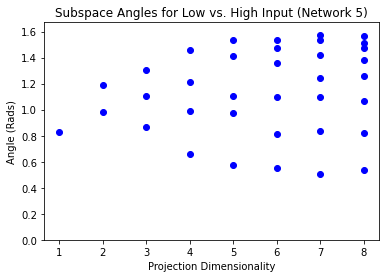

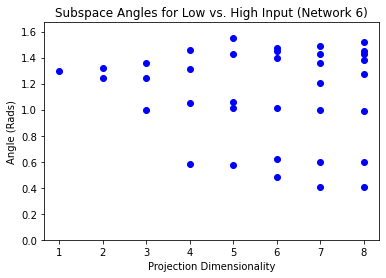

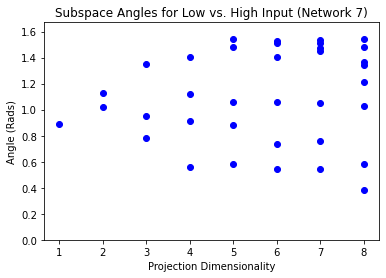

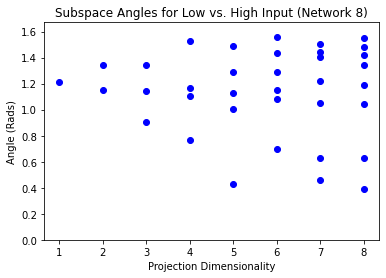

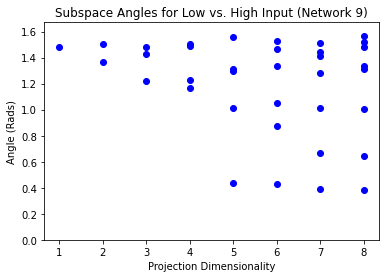

In [67]:
for i,angles in enumerate(all_angles):
    plt.errorbar(x, angles, fmt = 'bo')
    plt.xlabel('Projection Dimensionality')
    plt.ylabel('Angle (Rads)')
    plt.ylim(0, np.pi/2 + 0.1)
    plt.title('Subspace Angles for Low vs. High Input (Network {0})'.format(i))
    plt.show()

## Decision Task

In [68]:
time=10000
#High input means input 1 is greater
val1=0.8
val2=1.2

def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)
def high_inp(time):
    return val2 + np.random.normal(0, 0.05)
def low_inp(time):
    return val1 + np.random.normal(0,0.05)

high_inp_funcs = [bias, noise, high_inp, low_inp]
low_inp_funcs = [bias, noise, low_inp, high_inp]

### Trained

In [69]:
ds = np.arange(1,9,1)
all_angles = []
for network in decision_networks:
    high_inputs = network.convert(time, high_inp_funcs)
    low_inputs = network.convert(time, low_inp_funcs)
    outputs, high_activations = network.simulate(time, high_inputs, input_weights_decision[i], disable_progress_bar=True)
    outputs, low_activations = network.simulate(time, low_inputs, input_weights_decision[i], disable_progress_bar=True)
    low_activations=[np.asarray(activation) for activation in low_activations]
    low_activations = np.asarray(low_activations)
    high_activations=[np.asarray(activation) for activation in high_activations]
    high_activations = np.asarray(high_activations)
    
    dca_model_high = DCA(T=10)
    dca_model_low = DCA(T=10)
    dca_model_high.estimate_data_statistics(high_activations)
    dca_model_low.estimate_data_statistics(low_activations)
    angles = []
    for d in tqdm(ds):
        
        dca_model_low.fit_projection(d=d)
        low_coef = dca_model_low.coef_
        
        dca_model_high.fit_projection(d=d)
        high_coef = dca_model_high.coef_
        
        angles = np.append(angles, subspace_angles(high_coef,low_coef))
    all_angles.append(angles)

trained_mean_angles = np.mean(all_angles, axis=0) 
trained_std_angles = np.std(all_angles, axis=0)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [03:00<00:00, 22.58s/it]


In [70]:
x = []
for d in ds:
    x = np.append(x, d*np.ones(d))

Text(0.5, 1.0, 'Subspace Angles for Low vs. High Input')

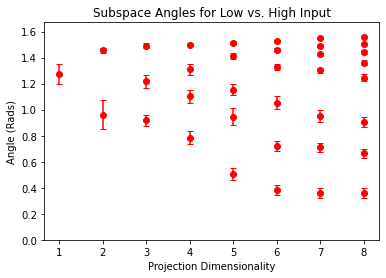

In [71]:
plt.errorbar(x, trained_mean_angles, yerr = trained_std_angles/np.sqrt(10), fmt = 'ro', capsize = 3)
plt.xlabel('Projection Dimensionality')
plt.ylabel('Angle (Rads)')
plt.ylim(0, np.pi/2 + 0.1)
plt.title('Subspace Angles for Low vs. High Input')

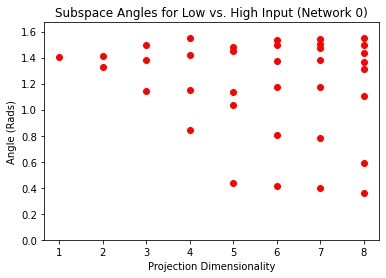

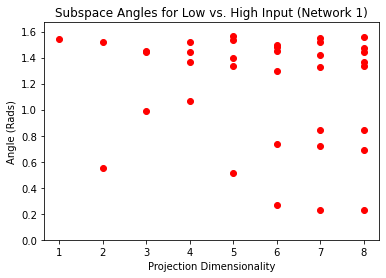

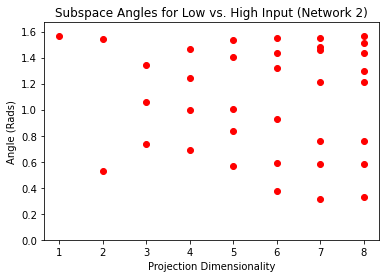

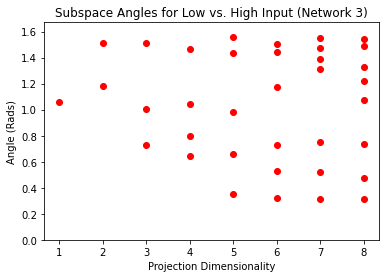

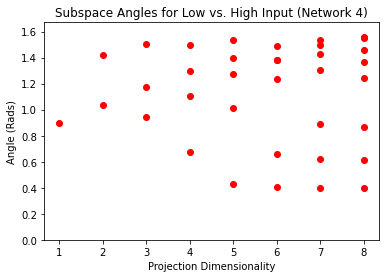

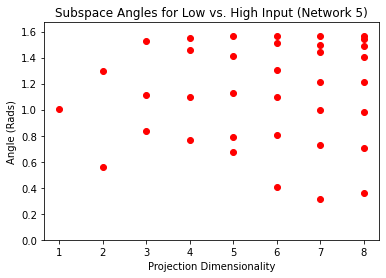

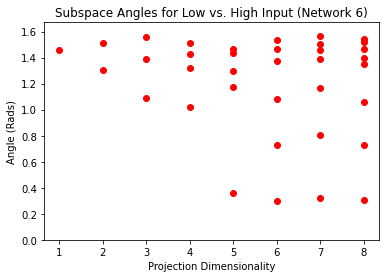

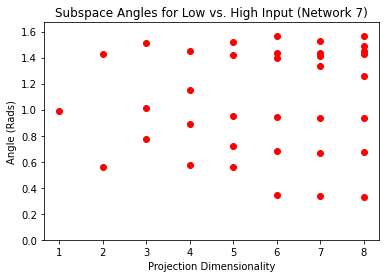

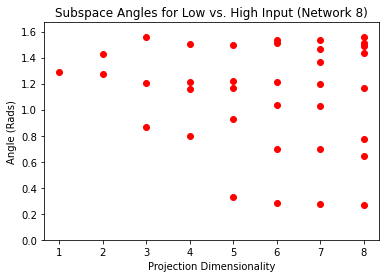

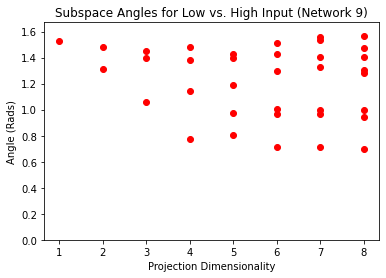

In [72]:
for i,angles in enumerate(all_angles):
    plt.errorbar(x, angles, fmt = 'ro', capsize = 3)
    plt.xlabel('Projection Dimensionality')
    plt.ylabel('Angle (Rads)')
    plt.ylim(0, np.pi/2 + 0.1)
    plt.title('Subspace Angles for Low vs. High Input (Network {0})'.format(i))
    plt.show()

In [73]:
np.array(all_angles).shape

(10, 36)

### Untrained

In [74]:
ds = np.arange(1,9,1)
all_angles = []
for network in decision_networks_untrained:
    high_inputs = network.convert(time, high_inp_funcs)
    low_inputs = network.convert(time, low_inp_funcs)
    outputs, high_activations = network.simulate(time, high_inputs, input_weights_decision[i], disable_progress_bar=True)
    outputs, low_activations = network.simulate(time, low_inputs, input_weights_decision[i], disable_progress_bar=True)
    low_activations=[np.asarray(activation) for activation in low_activations]
    low_activations = np.asarray(low_activations)
    high_activations=[np.asarray(activation) for activation in high_activations]
    high_activations = np.asarray(high_activations)
    
    dca_model_high = DCA(T=10)
    dca_model_low = DCA(T=10)
    dca_model_high.estimate_data_statistics(high_activations)
    dca_model_low.estimate_data_statistics(low_activations)
    angles = []
    for d in tqdm(ds):
        
        dca_model_low.fit_projection(d=d)
        low_coef = dca_model_low.coef_
        
        dca_model_high.fit_projection(d=d)
        high_coef = dca_model_high.coef_
        
        angles = np.append(angles, subspace_angles(high_coef,low_coef))
    all_angles.append(angles)

untrained_mean_angles = np.mean(all_angles, axis=0) 
untrained_std_angles = np.std(all_angles, axis=0)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [04:53<00:00, 36.71s/it]


In [75]:
x = []
for d in ds:
    x = np.append(x, d*np.ones(d))

Text(0.5, 1.0, 'Subspace Angles for Low vs. High Input')

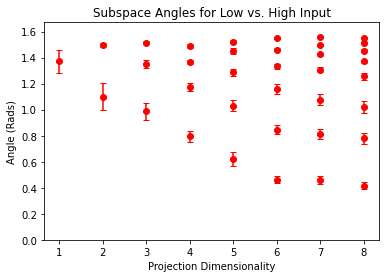

In [76]:
plt.errorbar(x, untrained_mean_angles, yerr = untrained_std_angles/np.sqrt(10), fmt = 'ro', capsize = 3)
plt.xlabel('Projection Dimensionality')
plt.ylabel('Angle (Rads)')
plt.ylim(0, np.pi/2 + 0.1)
plt.title('Subspace Angles for Low vs. High Input')

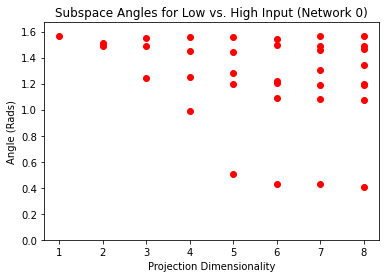

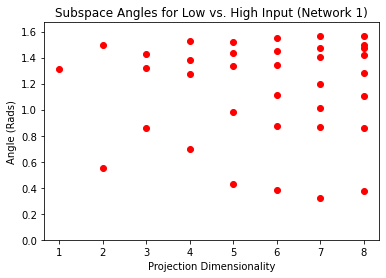

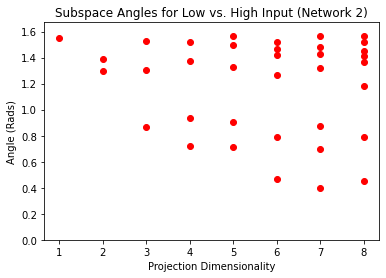

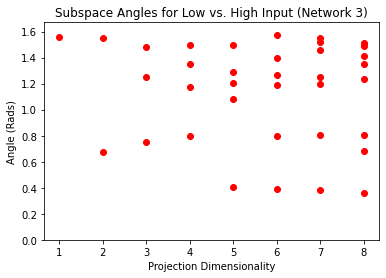

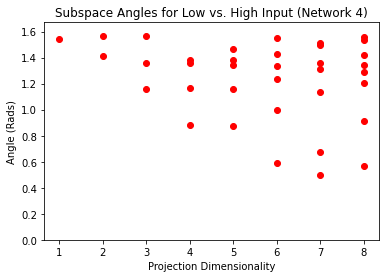

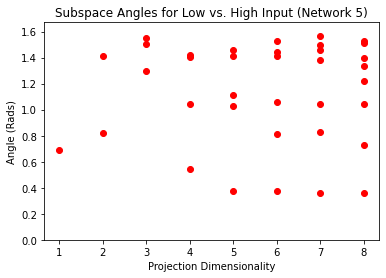

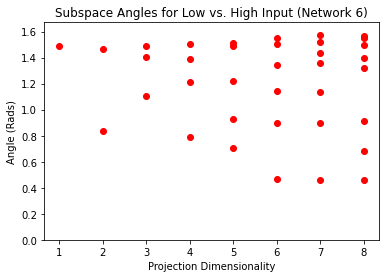

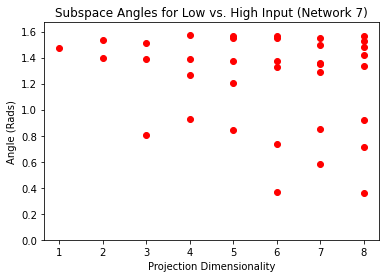

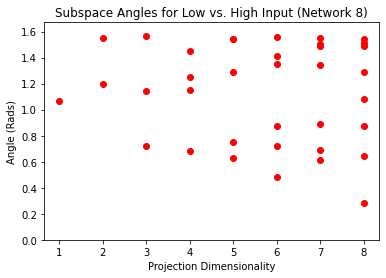

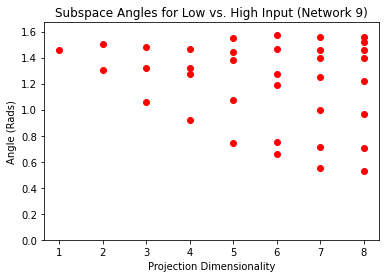

In [77]:
for i,angles in enumerate(all_angles):
    plt.errorbar(x, angles, fmt = 'ro', capsize = 3)
    plt.xlabel('Projection Dimensionality')
    plt.ylabel('Angle (Rads)')
    plt.ylim(0, np.pi/2 + 0.1)
    plt.title('Subspace Angles for Low vs. High Input (Network {0})'.format(i))
    plt.show()

# Subspace Angles of Trained vs Untrained

## Decision Task

In [9]:
time=10000
#High input means input 1 is greater
val1=0.8
val2=1.2

def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)
def high_inp(time):
    return val2 + np.random.normal(0, 0.05)
def low_inp(time):
    return val1 + np.random.normal(0,0.05)

high_inp_funcs = [bias, noise, high_inp, low_inp]
low_inp_funcs = [bias, noise, low_inp, high_inp]

### Input1>Input 2

In [11]:
ds = np.arange(1,9,1)
all_angles = []
for i, network in enumerate(decision_networks):
    untrained_network = decision_networks_untrained[i]
    high_inputs = network.convert(time, high_inp_funcs)
    outputs, trained_activations = network.simulate(time, high_inputs, input_weights_decision[i], disable_progress_bar=True)
    outputs, untrained_activations = untrained_network.simulate(time, high_inputs, input_weights_decision[i], disable_progress_bar=True)
    untrained_activations=[np.asarray(activation) for activation in untrained_activations]
    untrained_activations = np.asarray(untrained_activations)
    trained_activations=[np.asarray(activation) for activation in trained_activations]
    trained_activations = np.asarray(trained_activations)
    
    dca_model_trained = DCA(T=10)
    dca_model_untrained = DCA(T=10)
    dca_model_trained.estimate_data_statistics(trained_activations)
    dca_model_untrained.estimate_data_statistics(untrained_activations)
    angles = []
    for d in tqdm(ds):
        
        dca_model_trained.fit_projection(d=d)
        trained_coef = dca_model_trained.coef_
        
        dca_model_untrained.fit_projection(d=d)
        untrained_coef = dca_model_untrained.coef_
        
        angles = np.append(angles, subspace_angles(trained_coef,untrained_coef))
    all_angles.append(angles)

mean_angles = np.mean(all_angles, axis=0) 
std_angles = np.std(all_angles, axis=0)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [02:48<00:00, 21.12s/it]


In [12]:
x = []
for d in ds:
    x = np.append(x, d*np.ones(d))

Text(0.5, 1.0, 'Subspace Angles for Trained vs Untrained Network')

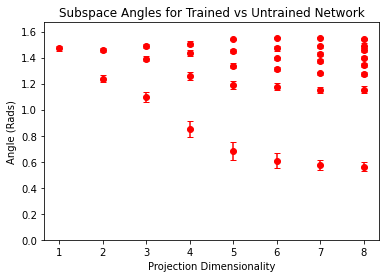

In [13]:
plt.errorbar(x, mean_angles, yerr = std_angles/np.sqrt(10), fmt = 'ro', capsize = 3)
plt.xlabel('Projection Dimensionality')
plt.ylabel('Angle (Rads)')
plt.ylim(0, np.pi/2 + 0.1)
plt.title('Subspace Angles for Trained vs Untrained Network')

## Perception Task

In [14]:
time=10000
def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)
def high_inp(time):
    return .8 + np.random.normal(0, 0.05)
def low_inp(time):
    return .5 + np.random.normal(0,0.05)

high_inp_funcs = [bias, noise, high_inp]
low_inp_funcs = [bias, noise, low_inp]

### Input=0.8

In [16]:
ds = np.arange(1,9,1)
all_angles = []
for i, network in enumerate(perception_networks):
    untrained_network = perception_networks_untrained[i]
    high_inputs = network.convert(time, high_inp_funcs)
    outputs, trained_activations = network.simulate(time, high_inputs, input_weights_perception[i], disable_progress_bar=True)
    outputs, untrained_activations = untrained_network.simulate(time, high_inputs, input_weights_perception[i], disable_progress_bar=True)
    untrained_activations=[np.asarray(activation) for activation in untrained_activations]
    untrained_activations = np.asarray(untrained_activations)
    trained_activations=[np.asarray(activation) for activation in trained_activations]
    trained_activations = np.asarray(trained_activations)
    
    dca_model_trained = DCA(T=10)
    dca_model_untrained = DCA(T=10)
    dca_model_trained.estimate_data_statistics(trained_activations)
    dca_model_untrained.estimate_data_statistics(untrained_activations)
    angles = []
    for d in tqdm(ds):
        
        dca_model_trained.fit_projection(d=d)
        trained_coef = dca_model_trained.coef_
        
        dca_model_untrained.fit_projection(d=d)
        untrained_coef = dca_model_untrained.coef_
        
        angles = np.append(angles, subspace_angles(trained_coef,untrained_coef))
    all_angles.append(angles)

mean_angles = np.mean(all_angles, axis=0) 
std_angles = np.std(all_angles, axis=0)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [03:04<00:00, 23.06s/it]


In [17]:
x = []
for d in ds:
    x = np.append(x, d*np.ones(d))

Text(0.5, 1.0, 'Subspace Angles for Trained vs Untrained Network')

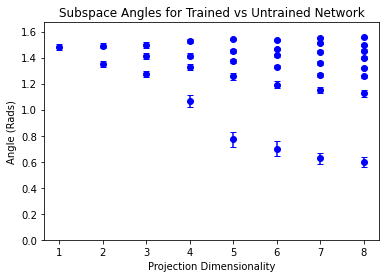

In [18]:
plt.errorbar(x, mean_angles, yerr = std_angles/np.sqrt(10), fmt = 'bo', capsize = 3)
plt.xlabel('Projection Dimensionality')
plt.ylabel('Angle (Rads)')
plt.ylim(0, np.pi/2 + 0.1)
plt.title('Subspace Angles for Trained vs Untrained Network')